In [21]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string
import sys
import glob

# Precinct Shapefile
---
## VEST's Documentation File

Election results from South Carolina State Election Commission (https://www.enr-scvotes.org/SC/92124/Web02-state.222648/#/)
Precinct shapefile primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The Lando/Lansford precinct in Chester County was merged to match the 2018 election results.

Absentee, provisional, emergency, and failsafe results were reported countywide. These were distributed to precincts based on the precinct's share of the county vote for each candidate.

In Spartanburg County the precinct labels for Trinity Methodist, Trinity Presbyterian, and West View Elementary were swapped to match the voter registration file. The boundary between Trinity Presbyterian and West View Elementary was also adjusted to match the county precinct map and the voter registration file.

* G18GOVDSMI - James Smith (Democratic Party)
* G18GOVRMCM - Henry McMaster (Republican Party)
* G18GOVOWRI - Write-in Votes


* G18SOSDWHI - Melvin T. Whittenburg (Democratic Party)
* G18SOSRHAM - Mark Hammond (Republican Party)
* G18SOSOWRI - Write-in Votes


* G18TREDGLE - Rosalyn L. Glenn (Democratic Party)
* G18TREWGLE - Rosalyn Glenn (Working Familites Party)
* G18TRERLOF - Curtis Loftis (Republican Party)
* G18TREAWOR - Sarah Work (American Party)
* G18TREOWRI - Write-in Votes


* G18ATGDANA - Constance Anastopoulo (Democratic Party)
* G18ATGWANA - Constance Anastopoulo (Working Families Party)
* G18ATGRWIL - Alan Wilson (Republican Party)
* G18ATGOWRI - Write-in Votes


* G18COMRECK - Richard Eckstrom (Republican Party)
* G18COMOWRI - Write-in Votes


* G18SPIRMIT - Molly Mitchell Spearman (Republican Party)
* G18SPIOWRI - Write-in Votes


* G18AGRUNEL - Chris Nelums (United Citizens Party)
* G18AGRGEDM - David Edmond (Green Party)
* G18AGRRWEA - Hugh Weathers (Republican Party)
* G18AGROWRI - Write-in Votes

## Load in VEST's Final File

In [22]:
vest_shp = gp.read_file("./raw-from-source/VEST/sc_2018/sc_2018.shp")

In [23]:
vest_shp.shape

(2247, 28)

In [24]:
vest_shp.head(10)

STATEFP COUNTYFP   VTDST             NAME  G18GOVDSMI  G18GOVRMCM  \
0      45      001  000001  Abbeville No. 1         279         538   
1      45      001  000002  Abbeville No. 2         402         223   
2      45      001  000003  Abbeville No. 3         302         278   
3      45      001  000004  Abbeville No. 4         128         298   
4      45      001  000005       Antreville         154         482   
5      45      001  000006       Broadmouth          77         184   
6      45      001  000007    Calhoun Falls         573         371   
7      45      001  000008     Cold Springs         131         429   
8      45      001  000009          Donalds          61         251   
9      45      001  000010         Due West         310         503   

   G18GOVOWRI  G18SOSDWHI  G18SOSRHAM  G18SOSOWRI  G18TREDGLE  G18TREWGLE  \
0           0         249         562           0         230           9   
1           0         394         233           0         383          12   
2           0         282         293           0         270           6   
3           0         129         300           0         121           2   
4           1         133         501           0         125           5   
5           0          73         187           0          74           4   
6           0         568         380           0         556          10   
7           4         110         449           1         108           7   
8           1          59         253           1          59           3   
9           0         287         521           0         276          10   

   G18TRERLOF  G18TREAWOR  G18TREOWRI  G18ATGDANA  G18ATGWANA  G18ATGRWIL  \
0         569           7           0         243          12         567   
1         233           4           0         394          13         224   
2         289          12           1         263          19         289   
3         299           7           0         117           9         301   
4         488          15           1         130          10         494   
5         178           4           0          70           5         182   
6         376           7           0         559          12         380   
7         436           6           1         105           8         442   
8         248           2           0          57           1         255   
9         497          10           0         297           7         503   

   G18ATGOWRI  G18COMRECK  G18COMOWRI  G18SPIRMIT  G18SPIOWRI  G18AGRUNEL  \
0           0         637           8         592           1          45   
1           0         326           7         238           0          79   
2           0         351           6         309           1          51   
3           0         324           0         303           2          29   
4           0         531           1         513           4          13   
5           0         200           3         188           2          10   
6           0         442           4         386           0          75   
7           2         481           3         457           1          21   
8           0         268           3         252           2          10   
9           0         563           4         529           2          42   

   G18AGRGEDM  G18AGRRWEA  G18AGROWRI  \
0          75         588           4   
1          72         253           3   
2          65         306           0   
3          24         301           0   
4          35         515           0   
5          23         182           0   
6          85         384           0   
7          29         456           1   
8          20         255           1   
9          65         525           0   

                                            geometry  
0  POLYGON Z ((-82.41472 34.20777 0.00000, -82.41...  
1  POLYGON Z ((-82.37928 34.17801 0.00000, -82.37...  
2  POLYGON Z ((-82.41234 34.13701 0.00000, -82.41...  
3  P

<AxesSubplot:>

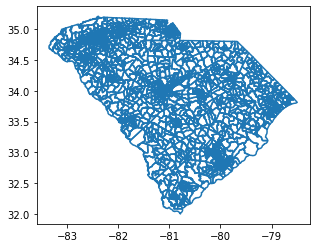

In [25]:
vest_shp.boundary.plot()

In [26]:
vest_shp.columns

Index(['STATEFP', 'COUNTYFP', 'VTDST', 'NAME', 'G18GOVDSMI', 'G18GOVRMCM',
       'G18GOVOWRI', 'G18SOSDWHI', 'G18SOSRHAM', 'G18SOSOWRI', 'G18TREDGLE',
       'G18TREWGLE', 'G18TRERLOF', 'G18TREAWOR', 'G18TREOWRI', 'G18ATGDANA',
       'G18ATGWANA', 'G18ATGRWIL', 'G18ATGOWRI', 'G18COMRECK', 'G18COMOWRI',
       'G18SPIRMIT', 'G18SPIOWRI', 'G18AGRUNEL', 'G18AGRGEDM', 'G18AGRRWEA',
       'G18AGROWRI', 'geometry'],
      dtype='object')

# Election Results

## Load Files
The SOS directed to this link for election results for the 2018 general: (https://www.enr-scvotes.org/SC/92124/Web02-state.222648/#/)

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
# folder = os.listdir("./raw-from-source/Election_Results/3_Excel/")
# files = []
# for val in folder:
#     file_string = "./raw-from-source/Election_Results/3_Excel/" + val
#     df = pd.concat(pd.read_excel(file_string, sheet_name = ['3','4','5','6','7','8','9']), axis = 1)
# #     index = np.array([df.columns.values, df.iloc[0].values])
# #     df.columns = pd.MultiIndex.from_arrays([df.columns, df.iloc[0].values])
# #     df.iloc[2:]

# ##     df = df.rename(columns = df.iloc[0], level=1)
    
#     df.columns = df.columns.droplevel()
#     df.columns = df.iloc[0]
# #     df = df.rename(columns = {df.columns[0]:'Precinct'})
#     df.rename(columns={df.columns[1]: "your value"}, inplace = True)
# #     df.drop(columns=list(filter(lambda e: e.isnull(), df.columns)))

# ## Create a list of columns you want to keep and drop all the other ones
# ## Keep columns by index
# # df = df.loc[:,~df.columns.duplicated()] --> removes all duplicated columns
# # How to remove columns certain values?
# # e.g Column names A, A, B, B, C
# # --> A, B, B, C

# #     df.columns = [f'{i}_{x}' for i, x in enumerate(df.columns, 1)]
# #     df = df.drop_duplicates(subset = 'Precinct', keep = 'first')
#     df = df.iloc[2:]
    
# #     df = df[df['1_Precinct'] != 'Total:']
#     df["County"] = val[:len(val) - 5]
#     files.append(df)   
# # sc_18 = pd.concat(files)


# # Things to Try
# df.columns.tolist()
# Li = df.columns()
# li[0]=“Precinct"
# df.columns = Li


In [29]:
folder = os.listdir("./raw-from-source/Election_Results/3_Excel/")
files = []
for val in folder:
    file_string = "./raw-from-source/Election_Results/3_Excel/" + val
    df = pd.concat(pd.read_excel(file_string, sheet_name = ['3','4','5','6','7','8','9']), axis = 1)
    df.columns = df.columns.droplevel()
    df.columns = df.iloc[0]
    df = df.rename(columns = {df.columns[0]:'Precinct'})
    df.columns = [f'{i}_{x}' for i, x in enumerate(df.columns, 1)]
    df.columns = df.columns.str.upper()
    df = df.iloc[2:]    
    df = df[df['1_PRECINCT'] != 'Total:']
    df["COUNTY"] = val[:len(val) - 5]
    files.append(df)   
sc_18 = pd.concat(files)

In [30]:
sc_18 = sc_18[['1_PRECINCT', '3_JAMES SMITH / MANDY POWERS NORRELL',
               '5_HENRY MCMASTER / PAMELA EVETTE','7_WRITE-IN', 
               '12_MELVIN T WHITTENBURG', '14_MARK HAMMOND',
               '16_WRITE-IN','21_ROSALYN L GLENN','23_ROSALYN GLENN','25_CURTIS LOFTIS', 
               '27_SARAH WORK','29_WRITE-IN','34_CONSTANCE ANASTOPOULO',
               '36_CONSTANCE ANASTOPOULO','38_ALAN WILSON','40_WRITE-IN',
               '45_RICHARD ECKSTROM','47_WRITE-IN','52_MOLLY MITCHELL SPEARMAN',
               '54_WRITE-IN','59_CHRIS NELUMS','61_DAVID EDMOND','63_HUGH WEATHERS',
               '65_WRITE-IN','COUNTY']]

In [31]:
sc_18 = sc_18.rename(columns = {'1_PRECINCT':'PRECINCT', 
                                '3_JAMES SMITH / MANDY POWERS NORRELL':'G18GOVDSMI',
                                '5_HENRY MCMASTER / PAMELA EVETTE':'G18GOVRMCM',
                                '7_WRITE-IN':'G18GOVOWRI',
                                '12_MELVIN T WHITTENBURG':'G18SOSDWHI',
                                '14_MARK HAMMOND':'G18SOSRHAM',
                                '16_WRITE-IN':'G18SOSOWRI',
                                '21_ROSALYN L GLENN':'G18TREDGLE', 
                                '23_ROSALYN GLENN':'G18TREWGLE', 
                                '25_CURTIS LOFTIS':'G18TRERLOF',
                                '27_SARAH WORK':'G18TREAWOR', 
                                '29_WRITE-IN':'G18TREOWRI',
                                '34_CONSTANCE ANASTOPOULO':'G18ATGDANA',
                                '36_CONSTANCE ANASTOPOULO':'G18ATGWANA', 
                                '38_ALAN WILSON':'G18ATGRWIL', 
                                '40_WRITE-IN':'G18ATGOWRI',
                                '45_RICHARD ECKSTROM':'G18COMRECK',
                                '47_WRITE-IN':'G18COMOWRI',
                                '52_MOLLY MITCHELL SPEARMAN':'G18SPIRMIT',
                                '54_WRITE-IN':'G18SPIOWRI',
                                '59_CHRIS NELUMS':'G18AGRUNEL', 
                                '61_DAVID EDMOND':'G18AGRGEDM', 
                                '63_HUGH WEATHERS':'G18AGRRWEA',
                                '65_WRITE-IN':'G18AGROWRI'})
sc_18 = sc_18[['COUNTY','PRECINCT', 'G18GOVDSMI', 'G18GOVRMCM', 'G18GOVOWRI', 'G18SOSDWHI',
       'G18SOSRHAM', 'G18SOSOWRI', 'G18TREDGLE', 'G18TREWGLE', 'G18TRERLOF',
       'G18TREAWOR', 'G18TREOWRI', 'G18ATGDANA', 'G18ATGWANA', 'G18ATGRWIL',
       'G18ATGOWRI', 'G18COMRECK', 'G18COMOWRI', 'G18SPIRMIT', 'G18SPIOWRI',
       'G18AGRUNEL', 'G18AGRGEDM', 'G18AGRRWEA', 'G18AGROWRI']]

In [32]:
sc_18 = sc_18.reset_index(drop=True)

In [33]:
sc_18['COUNTY'] = sc_18['COUNTY'].str.capitalize()
sc_18 = sc_18.replace('Mccormick','McCormick')

In [34]:
# Change strings to integers (County and Precinct columns remain unchanged)
sc_18 = sc_18.apply(pd.to_numeric, errors='ignore')

## Validation

### Statewide Candidate Totals 

In [35]:
data_columns = ['G18GOVDSMI', 'G18GOVRMCM', 'G18GOVOWRI',
       'G18SOSDWHI', 'G18SOSRHAM', 'G18SOSOWRI', 'G18TREDGLE', 'G18TREWGLE',
       'G18TRERLOF', 'G18TREAWOR', 'G18TREOWRI', 'G18ATGDANA', 'G18ATGWANA',
       'G18ATGRWIL', 'G18ATGOWRI', 'G18COMRECK', 'G18COMOWRI', 'G18SPIRMIT',
       'G18SPIOWRI', 'G18AGRUNEL', 'G18AGRGEDM', 'G18AGRRWEA', 'G18AGROWRI']
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [36]:
statewide_totals_check(vest_shp,sc_18,data_columns)

***Statewide Totals Check***
G18GOVDSMI is equal 	VEST / RDH: 784182
G18GOVRMCM is equal 	VEST / RDH: 921342
G18GOVOWRI is equal 	VEST / RDH: 2045
G18SOSDWHI is equal 	VEST / RDH: 727952
G18SOSRHAM is equal 	VEST / RDH: 970576
G18SOSOWRI is equal 	VEST / RDH: 968
G18TREDGLE is equal 	VEST / RDH: 694200
G18TREWGLE is equal 	VEST / RDH: 28777
G18TRERLOF is equal 	VEST / RDH: 952233
G18TREAWOR is equal 	VEST / RDH: 25979
G18TREOWRI is equal 	VEST / RDH: 711
G18ATGDANA is equal 	VEST / RDH: 729694
G18ATGWANA is equal 	VEST / RDH: 35112
G18ATGRWIL is equal 	VEST / RDH: 938032
G18ATGOWRI is equal 	VEST / RDH: 996
G18COMRECK is equal 	VEST / RDH: 1136932
G18COMOWRI is equal 	VEST / RDH: 26028
G18SPIRMIT is equal 	VEST / RDH: 998057
G18SPIOWRI is equal 	VEST / RDH: 18866
G18AGRUNEL is equal 	VEST / RDH: 118671
G18AGRGEDM is equal 	VEST / RDH: 202238
G18AGRRWEA is equal 	VEST / RDH: 1015366
G18AGROWRI is equal 	VEST / RDH: 5025


### County Totals

In [37]:
# Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="South Carolina"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

# Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

# Create the dictionary
SC_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

# Use the dictionary to go from a county name to a county FIPS and vice versa
sc_18["COUNTYFP"] = sc_18["COUNTY"].map(SC_fips_dict).fillna(sc_18["COUNTY"])

# Check the number of counties - looking for 46
print(len(sc_18["COUNTYFP"].unique()))

46


In [38]:
sc_18

COUNTY                            PRECINCT  G18GOVDSMI  \
0        Abbeville                     Abbeville No. 1         214   
1        Abbeville                     Abbeville No. 2         308   
2        Abbeville                     Abbeville No. 3         231   
3        Abbeville                     Abbeville No. 4          99   
4        Abbeville                          Antreville         118   
5        Abbeville                          Broadmouth          59   
6        Abbeville                       Calhoun Falls         439   
7        Abbeville                        Cold Springs         101   
8        Abbeville                            Donald's          47   
9        Abbeville                            Due West         237   
10       Abbeville                        Hall's Store         113   
11       Abbeville                              Keowee         107   
12       Abbeville                        Lowndesville          97   
13       Abbeville                             Lebanon         105   
14       Abbeville                          Smithville         111   
15       Abbeville                            Absentee         712   
16       Abbeville                           Emergency           0   
17       Abbeville                            Failsafe           0   
18       Abbeville                         Provisional           4   
19       Abbeville                Failsafe Provisional          11   
20           Aiken                         Aiken No. 1         214   
21           Aiken                         Aiken No. 2         325   
22           Aiken                         Aiken No. 3         452   
23           Aiken                         Aiken No. 4         214   
24           Aiken                         Aiken No. 5         309   
25           Aiken                         Aiken No. 6         237   
26           Aiken                                Bath         156   
27           Aiken                        Beech Island         375   
28           Aiken                     Belvedere No. 9         320   
29           Aiken                    Carolina Heights         332   
30           Aiken                       China Springs         390   
31           Aiken                          Clearwater         115   
32           Aiken                       College Acres         238   
33           Aiken                              Eureka         155   
34           Aiken                         Gloverville         122   
35           Aiken                        Graniteville         148   
36           Aiken                             Jackson         160   
37           Aiken                             Langley         132   
38           Aiken                             Lynwood         100   
39           Aiken                           Millbrook         290   
40           Aiken                             Monetta         241   
41           Aiken                  Montmorenci No. 22         285   
42           Aiken                        New Ellenton         355   
43           Aiken                         New Holland          96   
44           Aiken                   N. Augusta No. 25         252   
45           Aiken                   N. Augusta No. 26         212   
46           Aiken                   N. Augusta No. 27         142   
47           Aiken                   N. Augusta No. 28         151   
48           Aiken                   N. Augusta No. 29         224   
49           Aiken                           Oak Grove         100   
50           Aiken                               Perry         138   
51           Aiken                              Salley         183   
52           Aiken                          Shaws Fork         112   
53           Aiken                              Shiloh         242   
54           Aiken                   Six Points No. 35         250   
55           Aiken                          Tabernacle         158   
56           Aiken    

In [39]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [40]:
county_totals_check(vest_shp,sc_18,data_columns,"COUNTYFP", full_print=False)

***Countywide Totals Check***

G18GOVDSMI is equal across all counties
G18GOVRMCM is equal across all counties
G18GOVOWRI is equal across all counties
G18SOSDWHI is equal across all counties
G18SOSRHAM is equal across all counties
G18SOSOWRI is equal across all counties
G18TREDGLE is equal across all counties
G18TREWGLE is equal across all counties
G18TRERLOF is equal across all counties
G18TREAWOR is equal across all counties
G18TREOWRI is equal across all counties
G18ATGDANA is equal across all counties
G18ATGWANA is equal across all counties
G18ATGRWIL is equal across all counties
G18ATGOWRI is equal across all counties
G18COMRECK is equal across all counties
G18COMOWRI is equal across all counties
G18SPIRMIT is equal across all counties
G18SPIOWRI is equal across all counties
G18AGRUNEL is equal across all counties
G18AGRGEDM is equal across all counties
G18AGRRWEA is equal across all counties
G18AGROWRI is equal across all counties


### Precinct Totals

In [53]:
to_allocate_list = ['Absentee','Absentee 1','Absentee 2','Absentee 3','Absentee 4','Absentee 5','Absentee - B',
'Emergency','Emergency 1','Emergency 2','Emergency 3','Emergency 4','Emergency 5','Emergency - B',
'Failsafe','Failsafe 1','Failsafe 2','Failsafe 3','Failsafe 4','Failsafe 5','Failsafe - B',
'Provisional','Provisional 1','Provisional 2','Provisional 3','Provisional 4','Provisional 5','Provisional - B',
'Failsafe Provisional','Failsafe Provisional 1','Failsafe provisonal 1','Failsafe/Provisional']

to_allocate = sc_18[sc_18["PRECINCT"].isin(to_allocate_list)]
to_add_to = sc_18[~sc_18["PRECINCT"].isin(to_allocate_list)]

In [54]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating,allocating_to_all_empty_precs=False):    
    #Fill any n/a values with 0
    df_receiving_votes = df_receiving_votes.fillna(0)
    #Grab the original columns, so we can filter back down to them later
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    if (allocating_to_all_empty_precs):
        #In cases where every vote is 0, need to set the Total_Votes equal to 1 for proportional allocation
        df_receiving_votes.loc[:,"Total_Votes"]=1
    else:
        df_receiving_votes.loc[:,"Total_Votes"]=0
        for race in column_list:
            df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Add in total sum check
    sum_dataframe = pd.DataFrame(columns=precinct_specific_totals.columns)
    for i in column_list:
        total_votes = precinct_specific_totals.loc[:,i].sum()+to_dole_out_totals.loc[:,i].sum()
        sum_dataframe.at[0,i]=total_votes.astype(int)
    
    #Check the allocating to empty precincts code
    if (allocating_to_all_empty_precs):
        for i in column_list:
            if(sum(precinct_specific_totals[i])!=0):
                print("Allocating to all empty precincts parameter incorrect")
                break
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
                        if(row["Total_Votes"]==0):
                            precinct_specific_totals.loc[index,"Total_Votes"]=1
                            col_val = row[col_allocating]
                            df_receiving_votes.loc[df_receiving_votes[col_allocating]==col_val,"Total_Votes"]=1

    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        df_receiving_votes.loc[:,race] = df_receiving_votes.loc[:,race].astype(int)
        #Check to make sure all the votes have been allocated
        if ((sum_dataframe.loc[:,race].sum()-df_receiving_votes.loc[:,race].sum()!=0)):
            print("Some issue in allocating votes for:", i)
            
    #Filter down to original columns
    df_receiving_votes = df_receiving_votes[original_cols]

    return df_receiving_votes

In [55]:
sc_18 = allocate_absentee(to_add_to,to_allocate,data_columns,'COUNTYFP')

In [56]:
sc_18

COUNTY                            PRECINCT  G18GOVDSMI  \
0        Abbeville                     Abbeville no. 1         279   
1        Abbeville                     Abbeville no. 2         402   
2        Abbeville                     Abbeville no. 3         301   
3        Abbeville                     Abbeville no. 4         129   
4        Abbeville                          Antreville         154   
5        Abbeville                          Broadmouth          77   
6        Abbeville                       Calhoun falls         573   
7        Abbeville                        Cold springs         132   
8        Abbeville                            Donald's          61   
9        Abbeville                            Due west         309   
10       Abbeville                        Hall's store         147   
11       Abbeville                              Keowee         140   
12       Abbeville                        Lowndesville         127   
13       Abbeville                             Lebanon         137   
14       Abbeville                          Smithville         145   
20           Aiken                         Aiken no. 1         261   
21           Aiken                         Aiken no. 2         396   
22           Aiken                         Aiken no. 3         551   
23           Aiken                         Aiken no. 4         261   
24           Aiken                         Aiken no. 5         377   
25           Aiken                         Aiken no. 6         289   
26           Aiken                                Bath         190   
27           Aiken                        Beech island         457   
28           Aiken                     Belvedere no. 9         390   
29           Aiken                    Carolina heights         405   
30           Aiken                       China springs         476   
31           Aiken                          Clearwater         140   
32           Aiken                       College acres         290   
33           Aiken                              Eureka         189   
34           Aiken                         Gloverville         149   
35           Aiken                        Graniteville         180   
36           Aiken                             Jackson         195   
37           Aiken                             Langley         161   
38           Aiken                             Lynwood         122   
39           Aiken                           Millbrook         354   
40           Aiken                             Monetta         294   
41           Aiken                  Montmorenci no. 22         348   
42           Aiken                        New ellenton         433   
43           Aiken                         New holland         117   
44           Aiken                   N. augusta no. 25         307   
45           Aiken                   N. augusta no. 26         259   
46           Aiken                   N. augusta no. 27         173   
47           Aiken                   N. augusta no. 28         184   
48           Aiken                   N. augusta no. 29         273   
49           Aiken                           Oak grove         122   
50           Aiken                               Perry         168   
51           Aiken                              Salley         223   
52           Aiken                          Shaws fork         137   
53           Aiken                              Shiloh         295   
54           Aiken                   Six points no. 35         305   
55           Aiken                          Tabernacle         193   
56           Aiken                             Talatha         366   
57           Aiken                            Vaucluse         360   
58           Aiken                             Wagener         472   
59           Aiken                                Ward         333   
60           Aiken                         Warrenville         259   
61           Aiken    

In [57]:
vest_shp['NAME'] = vest_shp['NAME'].str.capitalize()
sc_18['PRECINCT'] = sc_18['PRECINCT'].str.capitalize()

In [58]:
#Create a VEST join col
vest_shp["join_col"] = vest_shp["COUNTYFP"]+"-"+vest_shp["NAME"]
#Check to make sure it is unique
# print(vest_shp["join_col"].value_counts(dropna=False))

#Create an election results join col
sc_18["join_col"] = sc_18["COUNTYFP"]+"-"+sc_18["PRECINCT"]
#Check to make sure it is unique
# print(sc_18["join_col"].value_counts(dropna=False))

In [59]:
join_attempt_one = pd.merge(vest_shp,sc_18,how="outer",on="join_col",indicator=True)
join_attempt_one["_merge"].value_counts()

both          2160
left_only       87
right_only      85
Name: _merge, dtype: int64

In [61]:
example = pd.read_csv("./example.csv")
example_dict = dict(zip(example["election_ID"], example["vest_ID"]))
print(example_dict)

{"001-Donald's": '001-Donalds', '005-Allendale #1': '005-Allendale no. 1', '005-Allendale #2': '005-Allendale no. 2', '005-Fairfax #1': '005-Fairfax no. 1', '005-Fairfax #2': '005-Fairfax no. 2', "007-Barker's creek-mcadams": "007-Barker's creek", '007-Fork no.1': '007-Fork no. 1', '007-Fork no.2': '007-Fork no. 2', "007-Neal's creek": '007-Neals creek', '007-North pointe': '007-North point', "007-Shirley's store": '007-Shirleys store', "007-Wright's school": '007-Wrights school', "007-Cox's creek": '007-Cox creek', '011-Barnwell 1': '011-Barnwell no. 1', '011-Barnwell 2': '011-Barnwell no. 2', '011-Barnwell 3': '011-Barnwell no. 3', '011-Barnwell 4': '011-Barnwell no. 4', '011-Blackville 1': '011-Blackville no. 1', '011-Blackville 2': '011-Blackville no. 2', '011-Williston 1': '011-Williston no. 1', '011-Williston 2': '011-Williston no. 2', '011-Williston 3': '011-Williston no. 3', '013-Saint helena 1a': '013-St. helena 1a', '013-Saint helena 1b': '013-St. helena 1b', '013-Saint helen

In [62]:
election_vest_id_changes_dict ={"001-Donald's": '001-Donalds', '005-Allendale #1': '005-Allendale no. 1', '005-Allendale #2': '005-Allendale no. 2', '005-Fairfax #1': '005-Fairfax no. 1', '005-Fairfax #2': '005-Fairfax no. 2', "007-Barker's creek-mcadams": "007-Barker's creek", '007-Fork no.1': '007-Fork no. 1', '007-Fork no.2': '007-Fork no. 2', "007-Neal's creek": '007-Neals creek', '007-North pointe': '007-North point', "007-Shirley's store": '007-Shirleys store', "007-Wright's school": '007-Wrights school', "007-Cox's creek": '007-Cox creek', '011-Barnwell 1': '011-Barnwell no. 1', '011-Barnwell 2': '011-Barnwell no. 2', '011-Barnwell 3': '011-Barnwell no. 3', '011-Barnwell 4': '011-Barnwell no. 4', '011-Blackville 1': '011-Blackville no. 1', '011-Blackville 2': '011-Blackville no. 2', '011-Williston 1': '011-Williston no. 1', '011-Williston 2': '011-Williston no. 2', '011-Williston 3': '011-Williston no. 3', '013-Saint helena 1a': '013-St. helena 1a', '013-Saint helena 1b': '013-St. helena 1b', '013-Saint helena 1c': '013-St. helena 1c', '013-Saint helena 2a': '013-St. helena 2a', '013-Saint helena 2b': '013-St. helena 2b', '013-Saint helena 2c': '013-St. helena 2c', '019-Lincolnville': '019-Licolnville', '021-Antioch and kings creek': "021-Antioch and king's creek", '021-Holly grove-buffalo': '021-Holly grove and buffalo', "021-Littlejohn's and sarratt's": "021-Little john and sarratt's", '021-Woods': "021-Wood's", '025-Mt. groghan': '025-Mt. croghan', '029-Canadys': "029-Canady's", '029-Wolf creek': '029-Wolfe creek', '037-Edgefield no.1': '037-Edgefield no. 1', '037-Edgefield no.2': '037-Edgefield no. 2', '037-Johnston no.1': '037-Johnston no. 1', '037-Johnston no.2': '037-Johnston no. 2', '037-Trenton no.1': '037-Trenton 1', '037-Merriweather no.1': '037-Merriweather no. 1', '037-Merriweather no.2': '037-Merriweather no. 2', '037-Trenton no.2': '037-Trenton 2', '039-Gladde3n grove': '039-Gladden grove', '039-Jenkinsville': '039-Jekinsville', '039-Woodard': '039-Woodward', '049-Hampton courthouse no.1': '049-Hampton cthse 1', '049-Hampton courthouse no.2': '049-Hampton cthse 2', "057-Gooch's cross roads": "057-Gooch's cross road", '061-Bishopville 1': '061-Bishopville no. 1', '061-Bishopville 2': '061-Bishopville no. 2', '061-Bishopville 4': '061-Bishopville no. 4', '061-South lynchburg': '061-S lynchburg', '061-Bishopville 3': '061-Bishopville no. 3', '063-Beulah  church': '063-Beulah church', "065-Clark's hill": '065-Clarks hill', '067-N west mullins': '067-Northwest mullins', '067-S west mullins': '067-Southwest mullins', '067-N east mullins': '067-Northeast mullins', '067-S east mullins': '067-Southeast mullins', '069-Red hill': '069-Redhill', '069-E bennettsville': '069-East bennettsville', '069-W bennettsville': '069-West bennettsville', '069-S bennettsville': '069-South bennettsville', '069-N bennettsville': '069-North bennettsville', '075-Orangeburg wd 1': '075-Orangeburg ward 1', '075-Orangeburg wd 2': '075-Orangeburg ward 2', '075-Orangeburg wd 3': '075-Orangeburg ward 3', '075-Orangeburg wd 4': '075-Orangeburg ward 4', '075-Orangeburg wd 5': '075-Orangeburg ward 5', '075-Orangeburg wd 6': '075-Orangeburg ward 6', '075-Ornageburg wd 7': '075-Orangeburg ward 7', '075-Orangeburg wd 8': '075-Orangeburg ward 8', '075-Orangeburg wd 9': '075-Orangeburg ward 9', '075-Orangeburg wd 10': '075-Orangeburg ward 10', '077-Mcallister': '077-Mcalister', '077-Lenhart': '077-Lenhardt', '085-St.john': '085-Saint john', '085-St. paul': '085-Saint paul', '089-Henry-poplar hill': '089-Henry poplar hl', '089-Kingstree no.1': '089-Kingstree no. 1', '089-Kingstree no.2': '089-Kingstree no. 2', '089-Kingstree no.3': '089-Kingstree no. 3', '089-Kingstree no.4': '089-Kingstree no. 4'}
sc_18["join_col"] = sc_18["join_col"].map(election_vest_id_changes_dict).fillna(sc_18["join_col"])

In [63]:
join_attempt_two = pd.merge(vest_shp,sc_18,how="outer",on="join_col",indicator="final_merge")
print(join_attempt_two["final_merge"].value_counts())

both          2245
left_only        2
right_only       0
Name: final_merge, dtype: int64


In [68]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["PRECINCT"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["PRECINCT"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["PRECINCT"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)

In [69]:
validater_row(join_attempt_two[join_attempt_two["final_merge"]=="both"], data_columns)

G18GOVRMCM .........................................................Abbeville no. 1 (V) ..538  (S)..537 (D):   -1
G18SOSDWHI .........................................................Abbeville no. 1 (V) ..249  (S)..248 (D):   -1
G18SOSRHAM .........................................................Abbeville no. 1 (V) ..562  (S)..561 (D):   -1
G18TRERLOF .........................................................Abbeville no. 1 (V) ..569  (S)..568 (D):   -1
G18ATGDANA .........................................................Abbeville no. 1 (V) ..243  (S)..244 (D):    1
G18ATGRWIL .........................................................Abbeville no. 1 (V) ..567  (S)..566 (D):   -1
G18AGRGEDM .........................................................Abbeville no. 1 (V) ...75  (S)...74 (D):   -1
G18AGRRWEA .........................................................Abbeville no. 1 (V) ..588  (S)..587 (D):   -1
G18TREWGLE .........................................................Abbeville no. 2 (V) 

G18SPIOWRI ...............................................................Millbrook (V) ....4  (S)....5 (D):    1
G18AGRUNEL ...............................................................Millbrook (V) ...50  (S)...49 (D):   -1
G18AGRGEDM ...............................................................Millbrook (V) ..132  (S)..129 (D):   -3
G18AGRRWEA ...............................................................Millbrook (V) ..669  (S)..668 (D):   -1
G18SOSRHAM .............................................................Aiken no. 4 (V) ...43  (S)...44 (D):    1
G18TRERLOF .............................................................Aiken no. 4 (V) ...40  (S)...41 (D):    1
G18ATGRWIL .............................................................Aiken no. 4 (V) ...40  (S)...41 (D):    1
G18SPIRMIT .............................................................Aiken no. 4 (V) ...42  (S)...43 (D):    1
G18AGRRWEA .............................................................Aiken no. 4 (V) 

G18GOVDSMI ..............................................................Tabernacle (V) ..192  (S)..193 (D):    1
G18SOSDWHI ..............................................................Tabernacle (V) ..185  (S)..186 (D):    1
G18TREDGLE ..............................................................Tabernacle (V) ..179  (S)..180 (D):    1
G18TRERLOF ..............................................................Tabernacle (V) ..200  (S)..201 (D):    1
G18ATGDANA ..............................................................Tabernacle (V) ..175  (S)..176 (D):    1
G18COMOWRI ..............................................................Tabernacle (V) ....3  (S)....4 (D):    1
G18SPIRMIT ..............................................................Tabernacle (V) ..209  (S)..210 (D):    1
G18AGRGEDM ..............................................................Tabernacle (V) ...37  (S)...38 (D):    1
G18GOVDSMI .......................................................N. augusta no. 25 (V) 

G18SPIRMIT .............................................................Pine forest (V) ..732  (S)..730 (D):   -2
G18AGROWRI .............................................................Pine forest (V) ....3  (S)....4 (D):    1
G18GOVDSMI ........................................................Gem lakes no. 60 (V) ..202  (S)..201 (D):   -1
G18SOSDWHI ........................................................Gem lakes no. 60 (V) ..179  (S)..180 (D):    1
G18SOSRHAM ........................................................Gem lakes no. 60 (V) ..579  (S)..580 (D):    1
G18TRERLOF ........................................................Gem lakes no. 60 (V) ..572  (S)..573 (D):    1
G18ATGDANA ........................................................Gem lakes no. 60 (V) ..170  (S)..171 (D):    1
G18ATGRWIL ........................................................Gem lakes no. 60 (V) ..579  (S)..580 (D):    1
G18GOVDSMI ............................................................Silver bluff (V) 

G18COMRECK ...........................................................Levels no. 72 (V) ..365  (S)..366 (D):    1
G18SPIRMIT ...........................................................Levels no. 72 (V) ..308  (S)..309 (D):    1
G18AGRRWEA ...........................................................Levels no. 72 (V) ..312  (S)..313 (D):    1
G18GOVDSMI ........................................................Fox creek no. 73 (V) ..178  (S)..179 (D):    1
G18GOVRMCM ........................................................Fox creek no. 73 (V) ..669  (S)..668 (D):   -1
G18SOSDWHI ........................................................Fox creek no. 73 (V) ..166  (S)..167 (D):    1
G18SOSRHAM ........................................................Fox creek no. 73 (V) ..685  (S)..684 (D):   -1
G18TREDGLE ........................................................Fox creek no. 73 (V) ..163  (S)..164 (D):    1
G18TRERLOF ........................................................Fox creek no. 73 (V) 

G18TREDGLE .......................................................N. augusta no. 54 (V) ..313  (S)..314 (D):    1
G18TREAWOR .......................................................N. augusta no. 54 (V) ....6  (S)....7 (D):    1
G18COMOWRI .......................................................N. augusta no. 54 (V) ...28  (S)...26 (D):   -2
G18SPIRMIT .......................................................N. augusta no. 54 (V) ..271  (S)..272 (D):    1
G18AGRGEDM .......................................................N. augusta no. 54 (V) ...70  (S)...71 (D):    1
G18AGRRWEA .......................................................N. augusta no. 54 (V) ..270  (S)..271 (D):    1
G18AGROWRI .......................................................N. augusta no. 54 (V) ...10  (S)....9 (D):   -1
G18SOSDWHI ..........................................................Willow springs (V) ..156  (S)..157 (D):    1
G18TREDGLE ..........................................................Willow springs (V) 

G18AGRRWEA .....................................................................Iva (V) ..595  (S)..596 (D):    1
G18SOSDWHI ............................................................Jackson mill (V) ...64  (S)...66 (D):    2
G18SOSRHAM ............................................................Jackson mill (V) ..327  (S)..329 (D):    2
G18TREDGLE ............................................................Jackson mill (V) ...62  (S)...64 (D):    2
G18TREWGLE ............................................................Jackson mill (V) ....5  (S)....6 (D):    1
G18TRERLOF ............................................................Jackson mill (V) ..321  (S)..322 (D):    1
G18ATGDANA ............................................................Jackson mill (V) ...63  (S)...65 (D):    2
G18ATGWANA ............................................................Jackson mill (V) ....5  (S)....6 (D):    1
G18ATGRWIL ............................................................Jackson mill (V) 

G18TREAWOR ...............................................................Pendleton (V) ...34  (S)...32 (D):   -2
G18ATGDANA ...............................................................Pendleton (V) ..740  (S)..735 (D):   -5
G18ATGWANA ...............................................................Pendleton (V) ...33  (S)...32 (D):   -1
G18ATGRWIL ...............................................................Pendleton (V) ..803  (S)..804 (D):    1
G18COMRECK ...............................................................Pendleton (V) .1001  (S).1000 (D):   -1
G18COMOWRI ...............................................................Pendleton (V) ...43  (S)...38 (D):   -5
G18SPIRMIT ...............................................................Pendleton (V) ..860  (S)..859 (D):   -1
G18SPIOWRI ...............................................................Pendleton (V) ...57  (S)...55 (D):   -2
G18AGRUNEL ...............................................................Pendleton (V) 

G18ATGWANA ............................................................Craytonville (V) ....8  (S)....9 (D):    1
G18COMRECK ............................................................Craytonville (V) ..481  (S)..482 (D):    1
G18AGRRWEA ............................................................Craytonville (V) ..469  (S)..470 (D):    1
G18GOVDSMI ............................................................Brushy creek (V) ..291  (S)..292 (D):    1
G18GOVRMCM ............................................................Brushy creek (V) .1078  (S).1075 (D):   -3
G18SOSDWHI ............................................................Brushy creek (V) ..235  (S)..236 (D):    1
G18SOSRHAM ............................................................Brushy creek (V) .1121  (S).1118 (D):   -3
G18TRERLOF ............................................................Brushy creek (V) .1108  (S).1106 (D):   -2
G18TREAWOR ............................................................Brushy creek (V) 

G18COMOWRI ...............................................................Flat rock (V) ....4  (S)....5 (D):    1
G18SPIRMIT ...............................................................Flat rock (V) ..509  (S)..511 (D):    2
G18AGRUNEL ...............................................................Flat rock (V) ...25  (S)...26 (D):    1
G18AGRRWEA ...............................................................Flat rock (V) ..509  (S)..510 (D):    1
G18GOVDSMI ...........................................................Homeland park (V) ..417  (S)..415 (D):   -2
G18GOVRMCM ...........................................................Homeland park (V) ..499  (S)..500 (D):    1
G18SOSDWHI ...........................................................Homeland park (V) ..407  (S)..405 (D):   -2
G18SOSRHAM ...........................................................Homeland park (V) ..510  (S)..511 (D):    1
G18TREDGLE ...........................................................Homeland park (V) 

G18TREDGLE ....................................................Green pond station a (V) ..281  (S)..279 (D):   -2
G18TREWGLE ....................................................Green pond station a (V) ...19  (S)...18 (D):   -1
G18TRERLOF ....................................................Green pond station a (V) ..974  (S)..972 (D):   -2
G18TREAWOR ....................................................Green pond station a (V) ...17  (S)...18 (D):    1
G18ATGDANA ....................................................Green pond station a (V) ..292  (S)..290 (D):   -2
G18ATGWANA ....................................................Green pond station a (V) ...22  (S)...21 (D):   -1
G18ATGRWIL ....................................................Green pond station a (V) ..968  (S)..967 (D):   -1
G18COMRECK ....................................................Green pond station a (V) .1080  (S).1078 (D):   -2
G18COMOWRI ....................................................Green pond station a (V) 

G18GOVRMCM ............................................................Simpsonville (V) ..991  (S)..989 (D):   -2
G18SOSDWHI ............................................................Simpsonville (V) ..326  (S)..322 (D):   -4
G18SOSRHAM ............................................................Simpsonville (V) .1035  (S).1033 (D):   -2
G18TREDGLE ............................................................Simpsonville (V) ..295  (S)..292 (D):   -3
G18TRERLOF ............................................................Simpsonville (V) .1032  (S).1030 (D):   -2
G18TREAWOR ............................................................Simpsonville (V) ...20  (S)...19 (D):   -1
G18ATGDANA ............................................................Simpsonville (V) ..325  (S)..323 (D):   -2
G18ATGWANA ............................................................Simpsonville (V) ...21  (S)...20 (D):   -1
G18ATGRWIL ............................................................Simpsonville (V) 

G18GOVRMCM .............................................................West pelzer (V) ..723  (S)..724 (D):    1
G18SOSRHAM .............................................................West pelzer (V) ..746  (S)..747 (D):    1
G18TREDGLE .............................................................West pelzer (V) ..118  (S)..120 (D):    2
G18TREWGLE .............................................................West pelzer (V) ....8  (S)....9 (D):    1
G18TRERLOF .............................................................West pelzer (V) ..740  (S)..741 (D):    1
G18ATGDANA .............................................................West pelzer (V) ..131  (S)..132 (D):    1
G18ATGWANA .............................................................West pelzer (V) ....9  (S)...10 (D):    1
G18ATGRWIL .............................................................West pelzer (V) ..739  (S)..738 (D):   -1
G18COMRECK .............................................................West pelzer (V) 

G18TREWGLE ............................................................Anderson 2/1 (V) ...10  (S)...11 (D):    1
G18TRERLOF ............................................................Anderson 2/1 (V) ..475  (S)..476 (D):    1
G18TREAWOR ............................................................Anderson 2/1 (V) ...10  (S)...11 (D):    1
G18ATGWANA ............................................................Anderson 2/1 (V) ...15  (S)...16 (D):    1
G18COMRECK ............................................................Anderson 2/1 (V) ..539  (S)..540 (D):    1
G18COMOWRI ............................................................Anderson 2/1 (V) ...21  (S)...20 (D):   -1
G18SPIRMIT ............................................................Anderson 2/1 (V) ..490  (S)..493 (D):    3
G18SPIOWRI ............................................................Anderson 2/1 (V) ....6  (S)....7 (D):    1
G18AGRGEDM ............................................................Anderson 2/1 (V) 

G18COMRECK ............................................................Anderson 6/2 (V) ...37  (S)...36 (D):   -1
G18COMOWRI ............................................................Anderson 6/2 (V) ....3  (S)....4 (D):    1
G18AGRUNEL ............................................................Anderson 6/2 (V) ...18  (S)...17 (D):   -1
G18AGRGEDM ............................................................Anderson 6/2 (V) ...24  (S)...23 (D):   -1
G18GOVDSMI ................................................................Varennes (V) ..219  (S)..220 (D):    1
G18SOSDWHI ................................................................Varennes (V) ..213  (S)..214 (D):    1
G18TREDGLE ................................................................Varennes (V) ..198  (S)..199 (D):    1
G18TREWGLE ................................................................Varennes (V) ...19  (S)...18 (D):   -1
G18ATGDANA ................................................................Varennes (V) 

G18AGRGEDM ............................................................Powdersville (V) ..194  (S)..191 (D):   -3
G18AGRRWEA ............................................................Powdersville (V) .1247  (S).1243 (D):   -4
G18GOVDSMI ................................................................Glenview (V) ..353  (S)..350 (D):   -3
G18GOVOWRI ................................................................Glenview (V) ....3  (S)....4 (D):    1
G18SOSDWHI ................................................................Glenview (V) ..321  (S)..318 (D):   -3
G18TREDGLE ................................................................Glenview (V) ..287  (S)..286 (D):   -1
G18TREWGLE ................................................................Glenview (V) ...27  (S)...25 (D):   -2
G18TRERLOF ................................................................Glenview (V) ..693  (S)..694 (D):    1
G18TREAWOR ................................................................Glenview (V) 

G18SPIRMIT ................................................................Ehrhardt (V) ..292  (S)..293 (D):    1
G18AGRRWEA ................................................................Ehrhardt (V) ..291  (S)..292 (D):    1
G18GOVRMCM ............................................................East denmark (V) ..214  (S)..215 (D):    1
G18SOSDWHI ............................................................East denmark (V) ..838  (S)..839 (D):    1
G18TRERLOF ............................................................East denmark (V) ..211  (S)..212 (D):    1
G18AGRUNEL ............................................................East denmark (V) ..133  (S)..132 (D):   -1
G18AGRRWEA ............................................................East denmark (V) ..230  (S)..229 (D):   -1
G18AGROWRI ............................................................East denmark (V) ....8  (S)....7 (D):   -1
G18GOVRMCM ...................................................................Govan (V) 

G18ATGDANA ..............................................................Beaufort 2 (V) ..282  (S)..283 (D):    1
G18COMRECK ..............................................................Beaufort 2 (V) ..406  (S)..407 (D):    1
G18COMOWRI ..............................................................Beaufort 2 (V) ...26  (S)...25 (D):   -1
G18SPIRMIT ..............................................................Beaufort 2 (V) ..333  (S)..334 (D):    1
G18AGRRWEA ..............................................................Beaufort 2 (V) ..329  (S)..330 (D):    1
G18GOVDSMI ..............................................................Beaufort 3 (V) ..328  (S)..329 (D):    1
G18GOVRMCM ..............................................................Beaufort 3 (V) ..397  (S)..398 (D):    1
G18SOSDWHI ..............................................................Beaufort 3 (V) ..286  (S)..288 (D):    2
G18SOSRHAM ..............................................................Beaufort 3 (V) 

G18AGRRWEA ...............................................................Burton 2b (V) ..461  (S)..459 (D):   -2
G18GOVDSMI ............................................................Chechessee 1 (V) ..381  (S)..379 (D):   -2
G18SOSDWHI ............................................................Chechessee 1 (V) ..335  (S)..337 (D):    2
G18TREDGLE ............................................................Chechessee 1 (V) ..323  (S)..324 (D):    1
G18TRERLOF ............................................................Chechessee 1 (V) ..728  (S)..727 (D):   -1
G18ATGDANA ............................................................Chechessee 1 (V) ..319  (S)..320 (D):    1
G18COMRECK ............................................................Chechessee 1 (V) ..813  (S)..812 (D):   -1
G18AGRGEDM ............................................................Chechessee 1 (V) ..119  (S)..120 (D):    1
G18AGRRWEA ............................................................Chechessee 1 (V) 

G18AGRRWEA .........................................................Ladys island 3a (V) ..397  (S)..398 (D):    1
G18TREWGLE ...........................................................Mossy oaks 1a (V) ....9  (S)...10 (D):    1
G18TRERLOF ...........................................................Mossy oaks 1a (V) ..368  (S)..369 (D):    1
G18ATGRWIL ...........................................................Mossy oaks 1a (V) ..366  (S)..367 (D):    1
G18COMRECK ...........................................................Mossy oaks 1a (V) ..440  (S)..441 (D):    1
G18SPIOWRI ...........................................................Mossy oaks 1a (V) ....6  (S)....7 (D):    1
G18AGRRWEA ...........................................................Mossy oaks 1a (V) ..383  (S)..384 (D):    1
G18GOVDSMI .............................................................Dale lobeco (V) ..410  (S)..408 (D):   -2
G18GOVRMCM .............................................................Dale lobeco (V) 

G18ATGRWIL ..........................................................Hilton head 5c (V) ..402  (S)..403 (D):    1
G18COMRECK ..........................................................Hilton head 5c (V) ..470  (S)..471 (D):    1
G18SPIRMIT ..........................................................Hilton head 5c (V) ..432  (S)..433 (D):    1
G18AGRUNEL ..........................................................Hilton head 5c (V) ...26  (S)...27 (D):    1
G18AGRRWEA ..........................................................Hilton head 5c (V) ..419  (S)..420 (D):    1
G18GOVDSMI ...........................................................Hilton head 8 (V) ..258  (S)..259 (D):    1
G18SOSDWHI ...........................................................Hilton head 8 (V) ..237  (S)..238 (D):    1
G18SOSRHAM ...........................................................Hilton head 8 (V) ..312  (S)..313 (D):    1
G18TREAWOR ...........................................................Hilton head 8 (V) 

G18AGRGEDM ..........................................................Hilton head 5a (V) ..134  (S)..135 (D):    1
G18AGRRWEA ..........................................................Hilton head 5a (V) ..484  (S)..483 (D):   -1
G18GOVDSMI ..........................................................Hilton head 2c (V) ..443  (S)..441 (D):   -2
G18GOVRMCM ..........................................................Hilton head 2c (V) ..770  (S)..769 (D):   -1
G18SOSDWHI ..........................................................Hilton head 2c (V) ..388  (S)..386 (D):   -2
G18SOSRHAM ..........................................................Hilton head 2c (V) ..798  (S)..797 (D):   -1
G18TREDGLE ..........................................................Hilton head 2c (V) ..374  (S)..373 (D):   -1
G18TRERLOF ..........................................................Hilton head 2c (V) ..798  (S)..797 (D):   -1
G18ATGDANA ..........................................................Hilton head 2c (V) 

G18AGRGEDM ..........................................................Hilton head 4d (V) ..119  (S)..120 (D):    1
G18GOVDSMI ..........................................................Hilton head 9a (V) ..543  (S)..542 (D):   -1
G18SOSDWHI ..........................................................Hilton head 9a (V) ..478  (S)..476 (D):   -2
G18SOSRHAM ..........................................................Hilton head 9a (V) ..599  (S)..598 (D):   -1
G18TREDGLE ..........................................................Hilton head 9a (V) ..452  (S)..450 (D):   -2
G18TRERLOF ..........................................................Hilton head 9a (V) ..577  (S)..576 (D):   -1
G18TREOWRI ..........................................................Hilton head 9a (V) ....4  (S)....3 (D):   -1
G18ATGDANA ..........................................................Hilton head 9a (V) ..477  (S)..475 (D):   -2
G18COMRECK ..........................................................Hilton head 9a (V) 

G18COMOWRI .............................................................Bluffton 4c (V) ...23  (S)...22 (D):   -1
G18SPIRMIT .............................................................Bluffton 4c (V) ..685  (S)..684 (D):   -1
G18SPIOWRI .............................................................Bluffton 4c (V) ...22  (S)...20 (D):   -2
G18AGRUNEL .............................................................Bluffton 4c (V) ...73  (S)...70 (D):   -3
G18AGRGEDM .............................................................Bluffton 4c (V) ..180  (S)..177 (D):   -3
G18GOVDSMI .............................................................Bluffton 5b (V) ..281  (S)..282 (D):    1
G18SOSDWHI .............................................................Bluffton 5b (V) ..262  (S)..263 (D):    1
G18SOSRHAM .............................................................Bluffton 5b (V) ..381  (S)..382 (D):    1
G18TREDGLE .............................................................Bluffton 5b (V) 

G18COMRECK ..............................................................Moss creek (V) ..944  (S)..943 (D):   -1
G18SPIRMIT ..............................................................Moss creek (V) ..855  (S)..854 (D):   -1
G18AGRUNEL ..............................................................Moss creek (V) ...34  (S)...35 (D):    1
G18AGRGEDM ..............................................................Moss creek (V) ..149  (S)..148 (D):   -1
G18AGROWRI ..............................................................Moss creek (V) ....1  (S)....2 (D):    1
G18GOVDSMI .............................................................Bluffton 2b (V) ..346  (S)..348 (D):    2
G18GOVRMCM .............................................................Bluffton 2b (V) ..273  (S)..274 (D):    1
G18SOSDWHI .............................................................Bluffton 2b (V) ..333  (S)..334 (D):    1
G18TREDGLE .............................................................Bluffton 2b (V) 

G18SOSRHAM ...............................................................Macedonia (V) ..777  (S)..775 (D):   -2
G18TREDGLE ...............................................................Macedonia (V) ...73  (S)...74 (D):    1
G18TREWGLE ...............................................................Macedonia (V) ...17  (S)...18 (D):    1
G18TRERLOF ...............................................................Macedonia (V) ..756  (S)..754 (D):   -2
G18ATGDANA ...............................................................Macedonia (V) ...83  (S)...84 (D):    1
G18ATGWANA ...............................................................Macedonia (V) ...20  (S)...21 (D):    1
G18ATGRWIL ...............................................................Macedonia (V) ..759  (S)..757 (D):   -2
G18COMRECK ...............................................................Macedonia (V) ..807  (S)..806 (D):   -1
G18SPIRMIT ...............................................................Macedonia (V) 

G18AGRRWEA ................................................................Eadytown (V) ...82  (S)...81 (D):   -1
G18GOVDSMI .........................................................Moncks corner 4 (V) ..267  (S)..268 (D):    1
G18GOVRMCM .........................................................Moncks corner 4 (V) ..565  (S)..563 (D):   -2
G18SOSDWHI .........................................................Moncks corner 4 (V) ..175  (S)..176 (D):    1
G18SOSRHAM .........................................................Moncks corner 4 (V) ..667  (S)..664 (D):   -3
G18TRERLOF .........................................................Moncks corner 4 (V) ..666  (S)..664 (D):   -2
G18ATGWANA .........................................................Moncks corner 4 (V) ...23  (S)...24 (D):    1
G18ATGRWIL .........................................................Moncks corner 4 (V) ..648  (S)..646 (D):   -2
G18COMRECK .........................................................Moncks corner 4 (V) 

G18SOSDWHI .............................................................Cordesville (V) ..234  (S)..235 (D):    1
G18SOSRHAM .............................................................Cordesville (V) ..387  (S)..388 (D):    1
G18TREDGLE .............................................................Cordesville (V) ..218  (S)..220 (D):    2
G18TRERLOF .............................................................Cordesville (V) ..384  (S)..386 (D):    2
G18ATGDANA .............................................................Cordesville (V) ..228  (S)..229 (D):    1
G18ATGRWIL .............................................................Cordesville (V) ..385  (S)..387 (D):    2
G18COMRECK .............................................................Cordesville (V) ..440  (S)..442 (D):    2
G18SPIRMIT .............................................................Cordesville (V) ..401  (S)..402 (D):    1
G18AGRRWEA .............................................................Cordesville (V) 

G18ATGWANA ..........................................................Devon forest 1 (V) ...36  (S)...35 (D):   -1
G18COMRECK ..........................................................Devon forest 1 (V) ..619  (S)..618 (D):   -1
G18COMOWRI ..........................................................Devon forest 1 (V) ...24  (S)...23 (D):   -1
G18SPIRMIT ..........................................................Devon forest 1 (V) ..478  (S)..477 (D):   -1
G18SPIOWRI ..........................................................Devon forest 1 (V) ...31  (S)...29 (D):   -2
G18GOVDSMI ..............................................................Sangaree 3 (V) ..321  (S)..323 (D):    2
G18GOVRMCM ..............................................................Sangaree 3 (V) ..344  (S)..346 (D):    2
G18SOSDWHI ..............................................................Sangaree 3 (V) ..309  (S)..311 (D):    2
G18TREDGLE ..............................................................Sangaree 3 (V) 

G18ATGRWIL ...................................................................Huger (V) ..234  (S)..235 (D):    1
G18COMRECK ...................................................................Huger (V) ..313  (S)..314 (D):    1
G18AGRGEDM ...................................................................Huger (V) ...82  (S)...83 (D):    1
G18GOVDSMI .........................................................Moncks corner 1 (V) ..310  (S)..311 (D):    1
G18GOVRMCM .........................................................Moncks corner 1 (V) ..449  (S)..450 (D):    1
G18SOSDWHI .........................................................Moncks corner 1 (V) ..276  (S)..277 (D):    1
G18TREWGLE .........................................................Moncks corner 1 (V) ....7  (S)....8 (D):    1
G18ATGDANA .........................................................Moncks corner 1 (V) ..279  (S)..280 (D):    1
G18COMRECK .........................................................Moncks corner 1 (V) 

G18AGRGEDM .............................................................Shulerville (V) ...16  (S)...17 (D):    1
G18GOVDSMI .............................................................Stratford 1 (V) ..318  (S)..319 (D):    1
G18GOVRMCM .............................................................Stratford 1 (V) ..321  (S)..322 (D):    1
G18SOSDWHI .............................................................Stratford 1 (V) ..308  (S)..309 (D):    1
G18SOSRHAM .............................................................Stratford 1 (V) ..327  (S)..328 (D):    1
G18TREDGLE .............................................................Stratford 1 (V) ..301  (S)..302 (D):    1
G18TREWGLE .............................................................Stratford 1 (V) ...17  (S)...18 (D):    1
G18TREAWOR .............................................................Stratford 1 (V) ...15  (S)...16 (D):    1
G18ATGDANA .............................................................Stratford 1 (V) 

G18SPIRMIT ...........................................................Whitesville 2 (V) ..464  (S)..465 (D):    1
G18AGRUNEL ...........................................................Whitesville 2 (V) ...74  (S)...73 (D):   -1
G18AGRRWEA ...........................................................Whitesville 2 (V) ..469  (S)..468 (D):   -1
G18GOVDSMI .........................................................Daniel island 3 (V) ..470  (S)..468 (D):   -2
G18SOSDWHI .........................................................Daniel island 3 (V) ..418  (S)..415 (D):   -3
G18TREDGLE .........................................................Daniel island 3 (V) ..388  (S)..386 (D):   -2
G18TREWGLE .........................................................Daniel island 3 (V) ...17  (S)...18 (D):    1
G18TRERLOF .........................................................Daniel island 3 (V) ..526  (S)..527 (D):    1
G18ATGDANA .........................................................Daniel island 3 (V) 

G18ATGDANA ...............................................................Hanahan 5 (V) ..181  (S)..182 (D):    1
G18ATGWANA ...............................................................Hanahan 5 (V) ...13  (S)...14 (D):    1
G18ATGRWIL ...............................................................Hanahan 5 (V) ..595  (S)..594 (D):   -1
G18COMRECK ...............................................................Hanahan 5 (V) ..658  (S)..657 (D):   -1
G18SPIRMIT ...............................................................Hanahan 5 (V) ..629  (S)..628 (D):   -1
G18AGRGEDM ...............................................................Hanahan 5 (V) ...55  (S)...56 (D):    1
G18AGRRWEA ...............................................................Hanahan 5 (V) ..638  (S)..637 (D):   -1
G18GOVDSMI ................................................................Moultrie (V) ..525  (S)..524 (D):   -1
G18GOVRMCM ................................................................Moultrie (V) 

G18AGRUNEL .............................................................Howe hall 2 (V) ...46  (S)...47 (D):    1
G18AGRRWEA .............................................................Howe hall 2 (V) ..280  (S)..281 (D):    1
G18GOVDSMI ...................................................................Royle (V) ..281  (S)..282 (D):    1
G18SOSDWHI ...................................................................Royle (V) ..272  (S)..273 (D):    1
G18SOSRHAM ...................................................................Royle (V) ..381  (S)..382 (D):    1
G18TREDGLE ...................................................................Royle (V) ..259  (S)..260 (D):    1
G18TREWGLE ...................................................................Royle (V) ...17  (S)...18 (D):    1
G18ATGDANA ...................................................................Royle (V) ..260  (S)..261 (D):    1
G18ATGWANA ...................................................................Royle (V) 

G18COMRECK ..............................................................Westview 4 (V) ..637  (S)..635 (D):   -2
G18SPIRMIT ..............................................................Westview 4 (V) ..546  (S)..547 (D):    1
G18AGRUNEL ..............................................................Westview 4 (V) ...54  (S)...55 (D):    1
G18AGRRWEA ..............................................................Westview 4 (V) ..554  (S)..556 (D):    2
G18GOVDSMI .............................................................North creek (V) ...28  (S)...29 (D):    1
G18AGRRWEA .............................................................North creek (V) ...51  (S)...52 (D):    1
G18GOVDSMI ...............................................................St. james (V) ..357  (S)..359 (D):    2
G18SOSDWHI ...............................................................St. james (V) ..330  (S)..332 (D):    2
G18SOSRHAM ...............................................................St. james (V) 

G18AGRUNEL ...............................................................Lone star (V) ...34  (S)...35 (D):    1
G18AGRGEDM ...............................................................Lone star (V) ...22  (S)...23 (D):    1
G18AGRRWEA ...............................................................Lone star (V) ..267  (S)..268 (D):    1
G18TRERLOF ..................................................................Midway (V) ..159  (S)..158 (D):   -1
G18SPIRMIT ..................................................................Midway (V) ..163  (S)..162 (D):   -1
G18SOSRHAM ..............................................................Murph hill (V) ..107  (S)..106 (D):   -1
G18COMRECK ..............................................................Murph hill (V) ..131  (S)..132 (D):    1
G18AGRGEDM ..............................................................Murph hill (V) ...32  (S)...31 (D):   -1
G18AGROWRI ..............................................................Murph hill (V) 

G18SOSRHAM ........................................................Isle of palms 1c (V) ..762  (S)..761 (D):   -1
G18TRERLOF ........................................................Isle of palms 1c (V) ..793  (S)..792 (D):   -1
G18ATGDANA ........................................................Isle of palms 1c (V) ..350  (S)..351 (D):    1
G18ATGRWIL ........................................................Isle of palms 1c (V) ..718  (S)..717 (D):   -1
G18COMRECK ........................................................Isle of palms 1c (V) ..827  (S)..826 (D):   -1
G18COMOWRI ........................................................Isle of palms 1c (V) ....9  (S)...10 (D):    1
G18SPIRMIT ........................................................Isle of palms 1c (V) ..779  (S)..778 (D):   -1
G18AGRUNEL ........................................................Isle of palms 1c (V) ...20  (S)...21 (D):    1
G18AGRGEDM ........................................................Isle of palms 1c (V) 

G18SOSDWHI ............................................................Deer park 1b (V) ..643  (S)..641 (D):   -2
G18TREDGLE ............................................................Deer park 1b (V) ..600  (S)..599 (D):   -1
G18TREWGLE ............................................................Deer park 1b (V) ...36  (S)...35 (D):   -1
G18ATGDANA ............................................................Deer park 1b (V) ..635  (S)..634 (D):   -1
G18ATGRWIL ............................................................Deer park 1b (V) ..395  (S)..394 (D):   -1
G18COMRECK ............................................................Deer park 1b (V) ..591  (S)..590 (D):   -1
G18COMOWRI ............................................................Deer park 1b (V) ...38  (S)...35 (D):   -3
G18SPIRMIT ............................................................Deer park 1b (V) ..437  (S)..436 (D):   -1
G18AGRUNEL ............................................................Deer park 1b (V) 

G18AGRUNEL ........................................................Town of seabrook (V) ...50  (S)...51 (D):    1
G18AGRGEDM ........................................................Town of seabrook (V) ..228  (S)..226 (D):   -2
G18GOVRMCM ............................................................Charleston 2 (V) ..341  (S)..342 (D):    1
G18SOSDWHI ............................................................Charleston 2 (V) ..193  (S)..194 (D):    1
G18SOSRHAM ............................................................Charleston 2 (V) ..366  (S)..367 (D):    1
G18TREDGLE ............................................................Charleston 2 (V) ..180  (S)..181 (D):    1
G18TRERLOF ............................................................Charleston 2 (V) ..380  (S)..381 (D):    1
G18ATGDANA ............................................................Charleston 2 (V) ..218  (S)..219 (D):    1
G18ATGRWIL ............................................................Charleston 2 (V) 

G18TRERLOF ............................................................Charleston 9 (V) ..113  (S)..114 (D):    1
G18ATGDANA ............................................................Charleston 9 (V) ..360  (S)..361 (D):    1
G18COMRECK ............................................................Charleston 9 (V) ..204  (S)..205 (D):    1
G18AGRGEDM ............................................................Charleston 9 (V) ..136  (S)..137 (D):    1
G18AGRRWEA ............................................................Charleston 9 (V) ..146  (S)..147 (D):    1
G18TREDGLE ...........................................................Charleston 14 (V) ..377  (S)..378 (D):    1
G18ATGDANA ...........................................................Charleston 14 (V) ..381  (S)..382 (D):    1
G18AGRGEDM ...........................................................Charleston 14 (V) ..185  (S)..186 (D):    1
G18GOVDSMI ...........................................................Charleston 15 (V) 

G18AGRGEDM ..........................................................Mt. pleasant 9 (V) ..101  (S)..102 (D):    1
G18AGRRWEA ..........................................................Mt. pleasant 9 (V) ..368  (S)..369 (D):    1
G18GOVDSMI ..........................................................Mt. pleasant 6 (V) ..499  (S)..498 (D):   -1
G18GOVRMCM ..........................................................Mt. pleasant 6 (V) ..546  (S)..545 (D):   -1
G18SOSDWHI ..........................................................Mt. pleasant 6 (V) ..441  (S)..440 (D):   -1
G18SOSRHAM ..........................................................Mt. pleasant 6 (V) ..588  (S)..587 (D):   -1
G18TRERLOF ..........................................................Mt. pleasant 6 (V) ..605  (S)..604 (D):   -1
G18ATGWANA ..........................................................Mt. pleasant 6 (V) ...30  (S)...31 (D):    1
G18ATGRWIL ..........................................................Mt. pleasant 6 (V) 

G18COMRECK .........................................................Mt. pleasant 27 (V) .1322  (S).1323 (D):    1
G18SPIRMIT .........................................................Mt. pleasant 27 (V) .1134  (S).1133 (D):   -1
G18AGRUNEL .........................................................Mt. pleasant 27 (V) ...70  (S)...71 (D):    1
G18AGRGEDM .........................................................Mt. pleasant 27 (V) ..289  (S)..286 (D):   -3
G18AGRRWEA .........................................................Mt. pleasant 27 (V) .1176  (S).1175 (D):   -1
G18GOVDSMI .........................................................Mt. pleasant 28 (V) ..343  (S)..344 (D):    1
G18GOVRMCM .........................................................Mt. pleasant 28 (V) ..439  (S)..438 (D):   -1
G18SOSRHAM .........................................................Mt. pleasant 28 (V) ..485  (S)..483 (D):   -2
G18TRERLOF .........................................................Mt. pleasant 28 (V) 

G18TREDGLE .........................................................Mt. pleasant 39 (V) ..542  (S)..541 (D):   -1
G18TREWGLE .........................................................Mt. pleasant 39 (V) ...32  (S)...33 (D):    1
G18TRERLOF .........................................................Mt. pleasant 39 (V) .1133  (S).1132 (D):   -1
G18TREAWOR .........................................................Mt. pleasant 39 (V) ...25  (S)...26 (D):    1
G18ATGDANA .........................................................Mt. pleasant 39 (V) ..638  (S)..637 (D):   -1
G18ATGRWIL .........................................................Mt. pleasant 39 (V) .1071  (S).1070 (D):   -1
G18SPIRMIT .........................................................Mt. pleasant 39 (V) .1163  (S).1162 (D):   -1
G18AGRGEDM .........................................................Mt. pleasant 39 (V) ..265  (S)..263 (D):   -2
G18GOVDSMI .........................................................James island 1a (V) 

G18SOSRHAM .........................................................James island 14 (V) ..420  (S)..419 (D):   -1
G18ATGDANA .........................................................James island 14 (V) ..278  (S)..279 (D):    1
G18COMRECK .........................................................James island 14 (V) ..517  (S)..516 (D):   -1
G18SPIRMIT .........................................................James island 14 (V) ..428  (S)..427 (D):   -1
G18AGRGEDM .........................................................James island 14 (V) ..143  (S)..144 (D):    1
G18AGRRWEA .........................................................James island 14 (V) ..453  (S)..452 (D):   -1
G18GOVDSMI .........................................................James island 15 (V) ..598  (S)..597 (D):   -1
G18GOVRMCM .........................................................James island 15 (V) ..419  (S)..418 (D):   -1
G18SOSDWHI .........................................................James island 15 (V) 

G18SPIRMIT ..........................................................James island 3 (V) ...86  (S)...87 (D):    1
G18AGRGEDM ..........................................................James island 3 (V) ..121  (S)..122 (D):    1
G18GOVDSMI ..........................................................James island 9 (V) ..513  (S)..512 (D):   -1
G18GOVRMCM ..........................................................James island 9 (V) ..331  (S)..332 (D):    1
G18SOSDWHI ..........................................................James island 9 (V) ..479  (S)..478 (D):   -1
G18SOSRHAM ..........................................................James island 9 (V) ..358  (S)..359 (D):    1
G18TREDGLE ..........................................................James island 9 (V) ..446  (S)..445 (D):   -1
G18TRERLOF ..........................................................James island 9 (V) ..352  (S)..353 (D):    1
G18ATGRWIL ..........................................................James island 9 (V) 

G18ATGRWIL .........................................................James island 20 (V) ..316  (S)..317 (D):    1
G18COMRECK .........................................................James island 20 (V) ..517  (S)..516 (D):   -1
G18SPIRMIT .........................................................James island 20 (V) ..377  (S)..378 (D):    1
G18AGRGEDM .........................................................James island 20 (V) ..269  (S)..267 (D):   -2
G18AGRRWEA .........................................................James island 20 (V) ..435  (S)..436 (D):    1
G18GOVDSMI .........................................................Johns island 1a (V) ..334  (S)..335 (D):    1
G18SOSDWHI .........................................................Johns island 1a (V) ..315  (S)..316 (D):    1
G18SOSRHAM .........................................................Johns island 1a (V) ..432  (S)..431 (D):   -1
G18TREDGLE .........................................................Johns island 1a (V) 

G18AGRUNEL .............................................................St. pauls 4 (V) ..103  (S)..100 (D):   -3
G18AGRGEDM .............................................................St. pauls 4 (V) ..113  (S)..114 (D):    1
G18AGRRWEA .............................................................St. pauls 4 (V) ..242  (S)..243 (D):    1
G18GOVDSMI .............................................................St. pauls 5 (V) ..282  (S)..283 (D):    1
G18GOVRMCM .............................................................St. pauls 5 (V) ..287  (S)..288 (D):    1
G18SOSDWHI .............................................................St. pauls 5 (V) ..267  (S)..268 (D):    1
G18SOSRHAM .............................................................St. pauls 5 (V) ..297  (S)..298 (D):    1
G18TRERLOF .............................................................St. pauls 5 (V) ..284  (S)..285 (D):    1
G18ATGWANA .............................................................St. pauls 5 (V) 

G18GOVDSMI ..........................................................St. andrews 18 (V) ..684  (S)..683 (D):   -1
G18SOSDWHI ..........................................................St. andrews 18 (V) ..658  (S)..657 (D):   -1
G18ATGDANA ..........................................................St. andrews 18 (V) ..671  (S)..670 (D):   -1
G18ATGRWIL ..........................................................St. andrews 18 (V) ..182  (S)..183 (D):    1
G18COMRECK ..........................................................St. andrews 18 (V) ..332  (S)..333 (D):    1
G18AGRRWEA ..........................................................St. andrews 18 (V) ..243  (S)..244 (D):    1
G18TREDGLE ..........................................................St. andrews 19 (V) ..143  (S)..144 (D):    1
G18ATGDANA ..........................................................St. andrews 19 (V) ..144  (S)..145 (D):    1
G18ATGRWIL ..........................................................St. andrews 19 (V) 

G18COMRECK ...........................................................St. andrews 7 (V) ..698  (S)..697 (D):   -1
G18SPIRMIT ...........................................................St. andrews 7 (V) ..578  (S)..576 (D):   -2
G18AGRUNEL ...........................................................St. andrews 7 (V) ...47  (S)...48 (D):    1
G18AGRGEDM ...........................................................St. andrews 7 (V) ..227  (S)..225 (D):   -2
G18AGRRWEA ...........................................................St. andrews 7 (V) ..630  (S)..629 (D):   -1
G18GOVDSMI ...........................................................St. andrews 6 (V) ..341  (S)..342 (D):    1
G18GOVRMCM ...........................................................St. andrews 6 (V) ..485  (S)..483 (D):   -2
G18SOSDWHI ...........................................................St. andrews 6 (V) ..274  (S)..275 (D):    1
G18SOSRHAM ...........................................................St. andrews 6 (V) 

G18COMRECK ..........................................................St. andrews 23 (V) ..245  (S)..246 (D):    1
G18SPIRMIT ..........................................................St. andrews 23 (V) ..158  (S)..159 (D):    1
G18AGRRWEA ..........................................................St. andrews 23 (V) ..187  (S)..188 (D):    1
G18GOVDSMI ..........................................................St. andrews 24 (V) ..372  (S)..373 (D):    1
G18SOSDWHI ..........................................................St. andrews 24 (V) ..359  (S)..360 (D):    1
G18TREDGLE ..........................................................St. andrews 24 (V) ..340  (S)..341 (D):    1
G18TRERLOF ..........................................................St. andrews 24 (V) ..185  (S)..186 (D):    1
G18ATGDANA ..........................................................St. andrews 24 (V) ..369  (S)..370 (D):    1
G18ATGRWIL ..........................................................St. andrews 24 (V) 

G18ATGRWIL ..........................................................St. andrews 35 (V) ..606  (S)..605 (D):   -1
G18COMRECK ..........................................................St. andrews 35 (V) ..752  (S)..751 (D):   -1
G18SPIRMIT ..........................................................St. andrews 35 (V) ..632  (S)..631 (D):   -1
G18AGRGEDM ..........................................................St. andrews 35 (V) ..166  (S)..167 (D):    1
G18AGRRWEA ..........................................................St. andrews 35 (V) ..681  (S)..680 (D):   -1
G18GOVRMCM ..........................................................St. andrews 36 (V) ..530  (S)..529 (D):   -1
G18SOSRHAM ..........................................................St. andrews 36 (V) ..550  (S)..548 (D):   -2
G18TREDGLE ..........................................................St. andrews 36 (V) ..379  (S)..380 (D):    1
G18TRERLOF ..........................................................St. andrews 36 (V) 

G18AGRRWEA .....................................................North charleston 16 (V) ..106  (S)..107 (D):    1
G18GOVDSMI .....................................................North charleston 17 (V) ..214  (S)..215 (D):    1
G18SOSDWHI .....................................................North charleston 17 (V) ..223  (S)..224 (D):    1
G18TREDGLE .....................................................North charleston 17 (V) ..211  (S)..213 (D):    2
G18ATGDANA .....................................................North charleston 17 (V) ..216  (S)..218 (D):    2
G18GOVDSMI .....................................................North charleston 19 (V) ..404  (S)..405 (D):    1
G18GOVRMCM .....................................................North charleston 19 (V) ...70  (S)...71 (D):    1
G18ATGDANA .....................................................North charleston 19 (V) ..394  (S)..395 (D):    1
G18ATGRWIL .....................................................North charleston 19 (V) 

G18TREDGLE .....................................................North charleston 14 (V) ..213  (S)..214 (D):    1
G18ATGRWIL .....................................................North charleston 14 (V) ...83  (S)...84 (D):    1
G18COMRECK .....................................................North charleston 14 (V) ..142  (S)..143 (D):    1
G18AGRUNEL .....................................................North charleston 14 (V) ...24  (S)...25 (D):    1
G18AGRGEDM .....................................................North charleston 14 (V) ...97  (S)...98 (D):    1
G18GOVDSMI .....................................................North charleston 15 (V) ..433  (S)..434 (D):    1
G18SOSDWHI .....................................................North charleston 15 (V) ..431  (S)..432 (D):    1
G18SOSRHAM .....................................................North charleston 15 (V) ...70  (S)...71 (D):    1
G18TREDGLE .....................................................North charleston 15 (V) 

G18TREDGLE ......................................................Gaffney ward no. 6 (V) ..163  (S)..162 (D):   -1
G18ATGDANA ......................................................Gaffney ward no. 6 (V) ..170  (S)..169 (D):   -1
G18SPIRMIT ......................................................Gaffney ward no. 6 (V) ..437  (S)..438 (D):    1
G18AGRUNEL ......................................................Gaffney ward no. 6 (V) ...33  (S)...34 (D):    1
G18AGRGEDM ......................................................Gaffney ward no. 6 (V) ...47  (S)...46 (D):   -1
G18GOVRMCM .......................................................Ezells and butler (V) ..605  (S)..606 (D):    1
G18TREDGLE .......................................................Ezells and butler (V) ..106  (S)..107 (D):    1
G18ATGDANA .......................................................Ezells and butler (V) ..112  (S)..113 (D):    1
G18COMRECK .......................................................Ezells and butler (V) 

G18ATGRWIL ......................................................Center grove-winzo (V) ..190  (S)..191 (D):    1
G18COMRECK ......................................................Center grove-winzo (V) ..214  (S)..215 (D):    1
G18AGRRWEA ......................................................Center grove-winzo (V) ..189  (S)..190 (D):    1
G18GOVDSMI ............................................................Cheraw no. 3 (V) ..529  (S)..528 (D):   -1
G18TREDGLE ............................................................Cheraw no. 3 (V) ..508  (S)..507 (D):   -1
G18ATGDANA ............................................................Cheraw no. 3 (V) ..518  (S)..517 (D):   -1
G18COMRECK ............................................................Cheraw no. 3 (V) ..279  (S)..280 (D):    1
G18TREAWOR ............................................................Cheraw no. 4 (V) ....4  (S)....5 (D):    1
G18GOVRMCM ..............................................................Courthouse (V) 

G18GOVDSMI ...........................................................Manning no. 4 (V) ..594  (S)..595 (D):    1
G18GOVRMCM ...........................................................Manning no. 4 (V) ..107  (S)..108 (D):    1
G18ATGDANA ...........................................................Manning no. 4 (V) ..587  (S)..588 (D):    1
G18AGRUNEL ...........................................................Manning no. 4 (V) ...92  (S)...91 (D):   -1
G18AGRGEDM ...........................................................Manning no. 4 (V) ...59  (S)...58 (D):   -1
G18GOVDSMI ...........................................................Manning no. 5 (V) ..289  (S)..288 (D):   -1
G18SOSDWHI ...........................................................Manning no. 5 (V) ..273  (S)..272 (D):   -1
G18SOSRHAM ...........................................................Manning no. 5 (V) ..226  (S)..227 (D):    1
G18TREDGLE ...........................................................Manning no. 5 (V) 

G18AGROWRI .............................................................Mashawville (V) ....7  (S)....6 (D):   -1
G18GOVDSMI .................................................................Peeples (V) ..279  (S)..277 (D):   -2
G18GOVRMCM .................................................................Peeples (V) ..341  (S)..340 (D):   -1
G18SOSDWHI .................................................................Peeples (V) ..269  (S)..268 (D):   -1
G18SOSRHAM .................................................................Peeples (V) ..352  (S)..351 (D):   -1
G18ATGWANA .................................................................Peeples (V) ...13  (S)...14 (D):    1
G18COMRECK .................................................................Peeples (V) ..422  (S)..421 (D):   -1
G18COMOWRI .................................................................Peeples (V) ....1  (S)....2 (D):    1
G18AGRGEDM .................................................................Peeples (V) 

G18GOVDSMI ........................................................Walterboro no. 3 (V) ..486  (S)..485 (D):   -1
G18TREDGLE ........................................................Walterboro no. 3 (V) ..477  (S)..478 (D):    1
G18TREAWOR ........................................................Walterboro no. 3 (V) ....2  (S)....3 (D):    1
G18ATGDANA ........................................................Walterboro no. 3 (V) ..483  (S)..482 (D):   -1
G18SPIOWRI ........................................................Walterboro no. 3 (V) ....4  (S)....3 (D):   -1
G18AGRUNEL ........................................................Walterboro no. 3 (V) ...81  (S)...80 (D):   -1
G18AGRGEDM ........................................................Walterboro no. 3 (V) ...60  (S)...61 (D):    1
G18GOVRMCM ........................................................Walterboro no. 4 (V) ..338  (S)..337 (D):   -1
G18TREWGLE ........................................................Walterboro no. 4 (V) 

G18AGRUNEL ..................................................................Bethel (V) ...29  (S)...30 (D):    1
G18AGRRWEA ..................................................................Bethel (V) ..201  (S)..202 (D):    1
G18GOVDSMI .......................................................Black creek-clyde (V) ..179  (S)..180 (D):    1
G18ATGRWIL .......................................................Black creek-clyde (V) ..446  (S)..447 (D):    1
G18ATGDANA ............................................................Burnt branch (V) ..135  (S)..136 (D):    1
G18ATGRWIL ............................................................Burnt branch (V) ..270  (S)..271 (D):    1
G18SOSRHAM ........................................................Darlington no. 1 (V) ...80  (S)...81 (D):    1
G18COMRECK ........................................................Darlington no. 1 (V) ..101  (S)..102 (D):    1
G18SOSDWHI ........................................................Darlington no. 2 (V) 

G18GOVRMCM ..............................................................Rosinville (V) ..340  (S)..341 (D):    1
G18SOSDWHI ..............................................................Rosinville (V) ..345  (S)..344 (D):   -1
G18SOSRHAM ..............................................................Rosinville (V) ..353  (S)..354 (D):    1
G18ATGRWIL ..............................................................Rosinville (V) ..346  (S)..347 (D):    1
G18COMRECK ..............................................................Rosinville (V) ..385  (S)..386 (D):    1
G18SPIRMIT ..............................................................Rosinville (V) ..358  (S)..359 (D):    1
G18AGRUNEL ..............................................................Rosinville (V) ...34  (S)...35 (D):    1
G18AGRRWEA ..............................................................Rosinville (V) ..387  (S)..388 (D):    1
G18GOVDSMI ........................................................St. george no. 2 (V) 

G18SOSRHAM ..............................................................Ridgeville (V) ..226  (S)..227 (D):    1
G18ATGDANA ..............................................................Ridgeville (V) ..208  (S)..209 (D):    1
G18AGRUNEL ..............................................................Ridgeville (V) ...40  (S)...41 (D):    1
G18GOVRMCM .................................................................Givhans (V) ..351  (S)..352 (D):    1
G18SOSRHAM .................................................................Givhans (V) ..354  (S)..355 (D):    1
G18ATGRWIL .................................................................Givhans (V) ..346  (S)..347 (D):    1
G18SPIRMIT .................................................................Givhans (V) ..364  (S)..365 (D):    1
G18TRERLOF ..............................................................Germantown (V) ..458  (S)..457 (D):   -1
G18AGRGEDM ..............................................................Germantown (V) 

G18AGRGEDM .......................................................Ashborough west 2 (V) ...87  (S)...88 (D):    1
G18GOVRMCM ...............................................................Greenwave (V) ..251  (S)..252 (D):    1
G18SOSRHAM ...............................................................Greenwave (V) ..255  (S)..256 (D):    1
G18TREDGLE ...............................................................Greenwave (V) ..182  (S)..183 (D):    1
G18ATGRWIL ...............................................................Greenwave (V) ..248  (S)..249 (D):    1
G18COMRECK ...............................................................Greenwave (V) ..314  (S)..315 (D):    1
G18AGRUNEL ...............................................................Greenwave (V) ...34  (S)...35 (D):    1
G18GOVDSMI ...............................................................Coastal 3 (V) ..178  (S)..179 (D):    1
G18TRERLOF ...............................................................Coastal 3 (V) 

G18COMRECK ...............................................................Butternut (V) ..765  (S)..764 (D):   -1
G18SPIRMIT ...............................................................Butternut (V) ..673  (S)..672 (D):   -1
G18AGRUNEL ...............................................................Butternut (V) ...65  (S)...66 (D):    1
G18AGRGEDM ...............................................................Butternut (V) ..141  (S)..140 (D):   -1
G18AGRRWEA ...............................................................Butternut (V) ..693  (S)..692 (D):   -1
G18GOVDSMI .................................................................Central (V) ..280  (S)..281 (D):    1
G18TREDGLE .................................................................Central (V) ..229  (S)..230 (D):    1
G18TRERLOF .................................................................Central (V) ..494  (S)..493 (D):   -1
G18ATGDANA .................................................................Central (V) 

G18ATGDANA ...............................................................Central 2 (V) ..261  (S)..262 (D):    1
G18ATGRWIL ...............................................................Central 2 (V) ..375  (S)..376 (D):    1
G18COMRECK ...............................................................Central 2 (V) ..474  (S)..473 (D):   -1
G18SPIRMIT ...............................................................Central 2 (V) ..423  (S)..422 (D):   -1
G18AGRGEDM ...............................................................Central 2 (V) ...81  (S)...82 (D):    1
G18AGRRWEA ...............................................................Central 2 (V) ..410  (S)..411 (D):    1
G18GOVDSMI ...............................................................Clemson 3 (V) ..309  (S)..308 (D):   -1
G18SOSDWHI ...............................................................Clemson 3 (V) ..302  (S)..301 (D):   -1
G18SOSRHAM ...............................................................Clemson 3 (V) 

G18TREDGLE ...............................................................Cypress 2 (V) ..101  (S)..102 (D):    1
G18ATGDANA ...............................................................Cypress 2 (V) ..119  (S)..120 (D):    1
G18ATGRWIL ...............................................................Cypress 2 (V) ..225  (S)..226 (D):    1
G18AGRRWEA ...............................................................Cypress 2 (V) ..250  (S)..251 (D):    1
G18SOSDWHI ............................................................Flowertown 3 (V) ..240  (S)..241 (D):    1
G18TRERLOF ............................................................Flowertown 3 (V) ..304  (S)..305 (D):    1
G18ATGRWIL ............................................................Flowertown 3 (V) ..291  (S)..292 (D):    1
G18COMRECK ............................................................Flowertown 3 (V) ..374  (S)..375 (D):    1
G18GOVRMCM ..............................................................Oakbrook 2 (V) 

G18SOSRHAM .........................................................Winnsboro mills (V) ..159  (S)..160 (D):    1
G18TRERLOF .........................................................Winnsboro mills (V) ..152  (S)..153 (D):    1
G18SPIRMIT .........................................................Winnsboro mills (V) ..161  (S)..162 (D):    1
G18AGRUNEL .........................................................Winnsboro mills (V) ...38  (S)...39 (D):    1
G18GOVRMCM .........................................................Winnsboro no. 1 (V) ..161  (S)..162 (D):    1
G18SOSRHAM .........................................................Winnsboro no. 1 (V) ..181  (S)..180 (D):   -1
G18ATGDANA .........................................................Winnsboro no. 1 (V) ..541  (S)..540 (D):   -1
G18ATGWANA .........................................................Winnsboro no. 1 (V) ...15  (S)...16 (D):    1
G18ATGRWIL .........................................................Winnsboro no. 1 (V) 

G18GOVOWRI ........................................................Coles crossroads (V) ....2  (S)....3 (D):    1
G18SOSDWHI ........................................................Coles crossroads (V) ..613  (S)..612 (D):   -1
G18TREDGLE ........................................................Coles crossroads (V) ..586  (S)..587 (D):    1
G18TREWGLE ........................................................Coles crossroads (V) ...19  (S)...18 (D):   -1
G18TRERLOF ........................................................Coles crossroads (V) ..786  (S)..785 (D):   -1
G18TREAWOR ........................................................Coles crossroads (V) ...19  (S)...18 (D):   -1
G18TREOWRI ........................................................Coles crossroads (V) ....4  (S)....3 (D):   -1
G18ATGWANA ........................................................Coles crossroads (V) ...32  (S)...30 (D):   -2
G18ATGRWIL ........................................................Coles crossroads (V) 

G18SOSRHAM ..........................................................Ebenezer no. 3 (V) ..529  (S)..528 (D):   -1
G18TRERLOF ..........................................................Ebenezer no. 3 (V) ..518  (S)..516 (D):   -2
G18TREAWOR ..........................................................Ebenezer no. 3 (V) ....9  (S)....8 (D):   -1
G18ATGDANA ..........................................................Ebenezer no. 3 (V) ..212  (S)..211 (D):   -1
G18ATGWANA ..........................................................Ebenezer no. 3 (V) ....7  (S)....8 (D):    1
G18ATGRWIL ..........................................................Ebenezer no. 3 (V) ..526  (S)..525 (D):   -1
G18SPIRMIT ..........................................................Ebenezer no. 3 (V) ..546  (S)..545 (D):   -1
G18SPIOWRI ..........................................................Ebenezer no. 3 (V) ...11  (S)...10 (D):   -1
G18AGRGEDM ..........................................................Ebenezer no. 3 (V) 

G18GOVRMCM .........................................................Florence ward 5 (V) ..158  (S)..159 (D):    1
G18SOSDWHI .........................................................Florence ward 5 (V) ..318  (S)..319 (D):    1
G18TREWGLE .........................................................Florence ward 5 (V) ....4  (S)....5 (D):    1
G18TRERLOF .........................................................Florence ward 5 (V) ..157  (S)..158 (D):    1
G18COMRECK .........................................................Florence ward 5 (V) ..227  (S)..228 (D):    1
G18SPIOWRI .........................................................Florence ward 5 (V) ....3  (S)....4 (D):    1
G18GOVRMCM .........................................................Florence ward 6 (V) ..271  (S)..272 (D):    1
G18TREWGLE .........................................................Florence ward 6 (V) ...14  (S)...13 (D):   -1
G18TREAWOR .........................................................Florence ward 6 (V) 

G18SOSRHAM ..................................................................Hannah (V) ..362  (S)..363 (D):    1
G18TREAWOR ..................................................................Hannah (V) ....3  (S)....4 (D):    1
G18ATGDANA ..................................................................Hannah (V) ...45  (S)...44 (D):   -1
G18COMRECK ..................................................................Hannah (V) ..372  (S)..371 (D):   -1
G18SOSDWHI .........................................................Lake city no. 1 (V) ..515  (S)..514 (D):   -1
G18TREWGLE .........................................................Lake city no. 1 (V) ...16  (S)...15 (D):   -1
G18TREAWOR .........................................................Lake city no. 1 (V) ....4  (S)....5 (D):    1
G18ATGDANA .........................................................Lake city no. 1 (V) ..510  (S)..512 (D):    2
G18ATGRWIL .........................................................Lake city no. 1 (V) 

G18GOVDSMI .........................................................Kingsburg-stone (V) ..317  (S)..318 (D):    1
G18GOVRMCM .........................................................Kingsburg-stone (V) ..220  (S)..221 (D):    1
G18SOSRHAM .........................................................Kingsburg-stone (V) ..223  (S)..224 (D):    1
G18TREWGLE .........................................................Kingsburg-stone (V) ....3  (S)....4 (D):    1
G18TRERLOF .........................................................Kingsburg-stone (V) ..223  (S)..225 (D):    2
G18ATGRWIL .........................................................Kingsburg-stone (V) ..228  (S)..229 (D):    1
G18COMOWRI .........................................................Kingsburg-stone (V) ....2  (S)....3 (D):    1
G18AGRGEDM .........................................................Kingsburg-stone (V) ...18  (S)...19 (D):    1
G18AGRRWEA .........................................................Kingsburg-stone (V) 

G18TREWGLE ........................................................South florence 2 (V) ...23  (S)...21 (D):   -2
G18TRERLOF ........................................................South florence 2 (V) ..190  (S)..189 (D):   -1
G18ATGDANA ........................................................South florence 2 (V) ..746  (S)..744 (D):   -2
G18ATGWANA ........................................................South florence 2 (V) ...25  (S)...24 (D):   -1
G18ATGRWIL ........................................................South florence 2 (V) ..180  (S)..179 (D):   -1
G18SPIOWRI ........................................................South florence 2 (V) ....5  (S)....6 (D):    1
G18AGRUNEL ........................................................South florence 2 (V) ..167  (S)..168 (D):    1
G18AGRRWEA ........................................................South florence 2 (V) ..228  (S)..229 (D):    1
G18AGROWRI ........................................................South florence 2 (V) 

G18SPIRMIT .............................................................Black river (V) ..626  (S)..625 (D):   -1
G18AGRGEDM .............................................................Black river (V) ...78  (S)...79 (D):    1
G18AGRRWEA .............................................................Black river (V) ..626  (S)..625 (D):   -1
G18GOVDSMI ...........................................................Brown's ferry (V) ..866  (S)..865 (D):   -1
G18SOSDWHI ...........................................................Brown's ferry (V) ..864  (S)..863 (D):   -1
G18TREDGLE ...........................................................Brown's ferry (V) ..856  (S)..855 (D):   -1
G18ATGDANA ...........................................................Brown's ferry (V) ..848  (S)..847 (D):   -1
G18ATGRWIL ...........................................................Brown's ferry (V) ..177  (S)..178 (D):    1
G18SPIRMIT ...........................................................Brown's ferry (V) 

G18TREDGLE ..................................................................Santee (V) ..537  (S)..536 (D):   -1
G18ATGDANA ..................................................................Santee (V) ..536  (S)..535 (D):   -1
G18GOVRMCM ............................................................Spring gully (V) ..359  (S)..360 (D):    1
G18ATGDANA ............................................................Spring gully (V) ..444  (S)..445 (D):    1
G18ATGRWIL ............................................................Spring gully (V) ..360  (S)..361 (D):    1
G18COMRECK ............................................................Spring gully (V) ..433  (S)..432 (D):   -1
G18AGRUNEL ............................................................Spring gully (V) ..106  (S)..103 (D):   -3
G18AGRGEDM ............................................................Spring gully (V) ...60  (S)...61 (D):    1
G18AGRRWEA ............................................................Spring gully (V) 

G18AGRUNEL ...................................................................Grove (V) ...70  (S)...69 (D):   -1
G18AGRGEDM ...................................................................Grove (V) ..105  (S)..106 (D):    1
G18AGRRWEA ...................................................................Grove (V) ..311  (S)..312 (D):    1
G18GOVRMCM ...............................................................Mauldin 1 (V) ..530  (S)..531 (D):    1
G18TREWGLE ...............................................................Mauldin 1 (V) ...18  (S)...19 (D):    1
G18TREAWOR ...............................................................Mauldin 1 (V) ...31  (S)...32 (D):    1
G18COMRECK ...............................................................Mauldin 1 (V) ..690  (S)..691 (D):    1
G18SPIOWRI ...............................................................Mauldin 1 (V) ...24  (S)...25 (D):    1
G18AGRUNEL ...............................................................Mauldin 1 (V) 

G18GOVDSMI ...........................................................Greenville 16 (V) ..543  (S)..544 (D):    1
G18GOVRMCM ...........................................................Greenville 16 (V) ..530  (S)..531 (D):    1
G18TREDGLE ...........................................................Greenville 16 (V) ..378  (S)..379 (D):    1
G18COMRECK ...........................................................Greenville 16 (V) ..816  (S)..817 (D):    1
G18AGRGEDM ...........................................................Greenville 16 (V) ..198  (S)..197 (D):   -1
G18GOVDSMI ...................................................................Aiken (V) ..277  (S)..278 (D):    1
G18SOSDWHI ...................................................................Aiken (V) ..275  (S)..276 (D):    1
G18TREDGLE ...................................................................Aiken (V) ..267  (S)..268 (D):    1
G18ATGDANA ...................................................................Aiken (V) 

G18ATGRWIL .................................................................Oakview (V) .1144  (S).1143 (D):   -1
G18COMRECK .................................................................Oakview (V) .1323  (S).1322 (D):   -1
G18COMOWRI .................................................................Oakview (V) ...26  (S)...27 (D):    1
G18SPIRMIT .................................................................Oakview (V) .1198  (S).1197 (D):   -1
G18AGRUNEL .................................................................Oakview (V) ...58  (S)...59 (D):    1
G18AGRGEDM .................................................................Oakview (V) ..222  (S)..221 (D):   -1
G18GOVRMCM ...........................................................Greenville 29 (V) ..172  (S)..173 (D):    1
G18SOSRHAM ...........................................................Greenville 29 (V) ..181  (S)..182 (D):    1
G18TRERLOF ...........................................................Greenville 29 (V) 

G18SOSDWHI .............................................................Belle meade (V) ..796  (S)..795 (D):   -1
G18TREDGLE .............................................................Belle meade (V) ..780  (S)..779 (D):   -1
G18COMOWRI .............................................................Belle meade (V) ...19  (S)...20 (D):    1
G18AGRGEDM .............................................................Belle meade (V) ..114  (S)..115 (D):    1
G18AGRRWEA .............................................................Belle meade (V) ...56  (S)...57 (D):    1
G18GOVDSMI ...................................................................Berea (V) ..314  (S)..315 (D):    1
G18SOSRHAM ...................................................................Berea (V) ..335  (S)..336 (D):    1
G18TREDGLE ...................................................................Berea (V) ..294  (S)..295 (D):    1
G18COMOWRI ...................................................................Berea (V) 

G18ATGRWIL ............................................................Circle creek (V) .1152  (S).1151 (D):   -1
G18COMOWRI ............................................................Circle creek (V) ...19  (S)...20 (D):    1
G18SPIRMIT ............................................................Circle creek (V) .1180  (S).1179 (D):   -1
G18AGRGEDM ............................................................Circle creek (V) ..213  (S)..212 (D):   -1
G18AGRRWEA ............................................................Circle creek (V) .1209  (S).1208 (D):   -1
G18GOVRMCM .................................................................Feaster (V) ..328  (S)..329 (D):    1
G18TRERLOF .................................................................Feaster (V) ..344  (S)..345 (D):    1
G18SPIRMIT .................................................................Feaster (V) ..352  (S)..353 (D):    1
G18GOVDSMI .............................................................Clear creek (V) 

G18TREDGLE .............................................................Neely farms (V) ..698  (S)..697 (D):   -1
G18TREWGLE .............................................................Neely farms (V) ...34  (S)...33 (D):   -1
G18TREAWOR .............................................................Neely farms (V) ...64  (S)...61 (D):   -3
G18ATGDANA .............................................................Neely farms (V) ..762  (S)..761 (D):   -1
G18ATGWANA .............................................................Neely farms (V) ...35  (S)...34 (D):   -1
G18ATGRWIL .............................................................Neely farms (V) .1262  (S).1261 (D):   -1
G18COMOWRI .............................................................Neely farms (V) ...42  (S)...40 (D):   -2
G18AGRGEDM .............................................................Neely farms (V) ..291  (S)..290 (D):   -1
G18GOVDSMI ................................................................Pineview (V) 

G18SOSRHAM ..............................................................Silverleaf (V) ..923  (S)..924 (D):    1
G18TRERLOF ..............................................................Silverleaf (V) ..937  (S)..938 (D):    1
G18TREAWOR ..............................................................Silverleaf (V) ...30  (S)...31 (D):    1
G18ATGWANA ..............................................................Silverleaf (V) ...27  (S)...28 (D):    1
G18AGRUNEL ..............................................................Silverleaf (V) ...33  (S)...34 (D):    1
G18AGRGEDM ..............................................................Silverleaf (V) ..206  (S)..205 (D):   -1
G18GOVRMCM ..........................................................Simpsonville 1 (V) ..806  (S)..805 (D):   -1
G18SOSDWHI ..........................................................Simpsonville 1 (V) ..515  (S)..514 (D):   -1
G18COMRECK ..........................................................Simpsonville 1 (V) 

G18COMRECK ..............................................................Thornblade (V) .1159  (S).1158 (D):   -1
G18SPIRMIT ..............................................................Thornblade (V) .1039  (S).1038 (D):   -1
G18SPIOWRI ..............................................................Thornblade (V) ...24  (S)...25 (D):    1
G18AGRRWEA ..............................................................Thornblade (V) .1082  (S).1081 (D):   -1
G18SOSRHAM ..................................................................Saluda (V) ..532  (S)..533 (D):    1
G18TREAWOR ..................................................................Saluda (V) ...18  (S)...19 (D):    1
G18ATGDANA ..................................................................Saluda (V) ..310  (S)..311 (D):    1
G18COMOWRI ..................................................................Saluda (V) ...26  (S)...27 (D):    1
G18SPIRMIT ..................................................................Saluda (V) 

G18COMOWRI ................................................................Woodmont (V) ...26  (S)...27 (D):    1
G18SPIRMIT ................................................................Woodmont (V) ..598  (S)..597 (D):   -1
G18GOVDSMI ............................................................Mt. pleasant (V) ..571  (S)..570 (D):   -1
G18SOSDWHI ............................................................Mt. pleasant (V) ..565  (S)..564 (D):   -1
G18SOSRHAM ............................................................Mt. pleasant (V) ..154  (S)..155 (D):    1
G18TRERLOF ............................................................Mt. pleasant (V) ..143  (S)..144 (D):    1
G18ATGDANA ............................................................Mt. pleasant (V) ..547  (S)..546 (D):   -1
G18ATGRWIL ............................................................Mt. pleasant (V) ..145  (S)..146 (D):    1
G18SPIRMIT ............................................................Mt. pleasant (V) 

G18COMRECK ........................................................Travelers rest 1 (V) .1068  (S).1067 (D):   -1
G18SPIOWRI ........................................................Travelers rest 1 (V) ...48  (S)...46 (D):   -2
G18AGRRWEA ........................................................Travelers rest 1 (V) ..993  (S)..992 (D):   -1
G18GOVRMCM ........................................................Travelers rest 2 (V) ..581  (S)..580 (D):   -1
G18AGRRWEA ........................................................Travelers rest 2 (V) ..622  (S)..621 (D):   -1
G18GOVDSMI .............................................................Tyger river (V) ..320  (S)..321 (D):    1
G18SOSDWHI .............................................................Tyger river (V) ..290  (S)..291 (D):    1
G18TRERLOF .............................................................Tyger river (V) ..383  (S)..382 (D):   -1
G18ATGRWIL .............................................................Tyger river (V) 

G18SPIRMIT ............................................................Hope's ferry (V) ..140  (S)..139 (D):   -1
G18AGRRWEA ............................................................Hope's ferry (V) ..147  (S)..146 (D):   -1
G18GOVRMCM ........................................................Pebble stone way (V) ..291  (S)..290 (D):   -1
G18SOSDWHI ........................................................Pebble stone way (V) ..173  (S)..174 (D):    1
G18TREDGLE ........................................................Pebble stone way (V) ..159  (S)..160 (D):    1
G18TREWGLE ........................................................Pebble stone way (V) ...11  (S)...12 (D):    1
G18TREAWOR ........................................................Pebble stone way (V) ....5  (S)....6 (D):    1
G18COMRECK ........................................................Pebble stone way (V) ..351  (S)..350 (D):   -1
G18AGRUNEL ........................................................Pebble stone way (V) 

G18ATGDANA ..................................................................Harris (V) ..112  (S)..113 (D):    1
G18ATGWANA ..................................................................Harris (V) ...21  (S)...18 (D):   -3
G18ATGRWIL ..................................................................Harris (V) ..259  (S)..260 (D):    1
G18COMRECK ..................................................................Harris (V) ..315  (S)..316 (D):    1
G18SPIRMIT ..................................................................Harris (V) ..281  (S)..282 (D):    1
G18AGRGEDM ..................................................................Harris (V) ...33  (S)...34 (D):    1
G18AGRRWEA ..................................................................Harris (V) ..278  (S)..279 (D):    1
G18GOVRMCM ................................................................Coronaca (V) ..556  (S)..555 (D):   -1
G18SOSDWHI ................................................................Coronaca (V) 

G18COMOWRI .................................................................Epworth (V) ....2  (S)....3 (D):    1
G18SPIRMIT .................................................................Epworth (V) ..274  (S)..275 (D):    1
G18AGRGEDM .................................................................Epworth (V) ...18  (S)...19 (D):    1
G18AGRRWEA .................................................................Epworth (V) ..271  (S)..272 (D):    1
G18GOVDSMI .............................................................Ware shoals (V) ..142  (S)..144 (D):    2
G18SOSDWHI .............................................................Ware shoals (V) ..134  (S)..135 (D):    1
G18TREDGLE .............................................................Ware shoals (V) ..134  (S)..135 (D):    1
G18ATGDANA .............................................................Ware shoals (V) ..137  (S)..138 (D):    1
G18AGRUNEL .............................................................Ware shoals (V) 

G18SPIRMIT .................................................................Airport (V) ..479  (S)..478 (D):   -1
G18AGRGEDM .................................................................Airport (V) ...63  (S)...62 (D):   -1
G18AGRRWEA .................................................................Airport (V) ..480  (S)..479 (D):   -1
G18GOVDSMI ............................................................Civic center (V) ..334  (S)..332 (D):   -2
G18GOVRMCM ............................................................Civic center (V) ..253  (S)..254 (D):    1
G18SOSDWHI ............................................................Civic center (V) ..335  (S)..333 (D):   -2
G18TREDGLE ............................................................Civic center (V) ..321  (S)..320 (D):   -1
G18TREWGLE ............................................................Civic center (V) ...12  (S)...13 (D):    1
G18TRERLOF ............................................................Civic center (V) 

G18TREDGLE ..............................................................New castle (V) ..149  (S)..150 (D):    1
G18TREWGLE ..............................................................New castle (V) ....4  (S)....5 (D):    1
G18TRERLOF ..............................................................New castle (V) ..416  (S)..415 (D):   -1
G18ATGRWIL ..............................................................New castle (V) ..420  (S)..419 (D):   -1
G18COMRECK ..............................................................New castle (V) ..483  (S)..482 (D):   -1
G18SPIRMIT ..............................................................New castle (V) ..436  (S)..435 (D):   -1
G18AGRUNEL ..............................................................New castle (V) ...35  (S)...36 (D):    1
G18GOVRMCM .......................................................Rutherford shoals (V) ..280  (S)..281 (D):    1
G18SOSRHAM .......................................................Rutherford shoals (V) 

G18AGRGEDM ............................................................Gideon's way (V) ...58  (S)...56 (D):   -2
G18AGRRWEA ............................................................Gideon's way (V) ..173  (S)..172 (D):   -1
G18GOVDSMI ...........................................................Parson's mill (V) ..198  (S)..199 (D):    1
G18GOVRMCM ...........................................................Parson's mill (V) ..256  (S)..257 (D):    1
G18SOSDWHI ...........................................................Parson's mill (V) ..174  (S)..175 (D):    1
G18SOSRHAM ...........................................................Parson's mill (V) ..278  (S)..279 (D):    1
G18TREDGLE ...........................................................Parson's mill (V) ..160  (S)..161 (D):    1
G18TRERLOF ...........................................................Parson's mill (V) ..254  (S)..255 (D):    1
G18TREAWOR ...........................................................Parson's mill (V) 

G18TREDGLE ................................................................Brownway (V) ..124  (S)..125 (D):    1
G18TRERLOF ................................................................Brownway (V) ..639  (S)..640 (D):    1
G18ATGDANA ................................................................Brownway (V) ..128  (S)..129 (D):    1
G18ATGRWIL ................................................................Brownway (V) ..646  (S)..647 (D):    1
G18COMRECK ................................................................Brownway (V) ..685  (S)..684 (D):   -1
G18AGRUNEL ................................................................Brownway (V) ...25  (S)...26 (D):    1
G18AGRRWEA ................................................................Brownway (V) ..655  (S)..656 (D):    1
G18GOVDSMI .............................................................Cedar grove (V) ...71  (S)...72 (D):    1
G18GOVRMCM .............................................................Cedar grove (V) 

G18AGRUNEL ...................................................................Aynor (V) ...23  (S)...24 (D):    1
G18AGRGEDM ...................................................................Aynor (V) ...30  (S)...31 (D):    1
G18AGRRWEA ...................................................................Aynor (V) ..714  (S)..715 (D):    1
G18GOVRMCM ..........................................................Bayboro-gurley (V) ..407  (S)..408 (D):    1
G18SOSRHAM ..........................................................Bayboro-gurley (V) ..416  (S)..417 (D):    1
G18TRERLOF ..........................................................Bayboro-gurley (V) ..403  (S)..404 (D):    1
G18ATGRWIL ..........................................................Bayboro-gurley (V) ..409  (S)..410 (D):    1
G18COMRECK ..........................................................Bayboro-gurley (V) ..438  (S)..439 (D):    1
G18SPIRMIT ..........................................................Bayboro-gurley (V) 

G18SOSDWHI ...........................................................Hickory grove (V) ..151  (S)..152 (D):    1
G18SOSRHAM ...........................................................Hickory grove (V) ..571  (S)..572 (D):    1
G18TREDGLE ...........................................................Hickory grove (V) ..143  (S)..144 (D):    1
G18ATGDANA ...........................................................Hickory grove (V) ..152  (S)..153 (D):    1
G18ATGRWIL ...........................................................Hickory grove (V) ..559  (S)..560 (D):    1
G18COMRECK ...........................................................Hickory grove (V) ..602  (S)..603 (D):    1
G18AGRGEDM ...........................................................Hickory grove (V) ...41  (S)...42 (D):    1
G18GOVRMCM ..................................................................Inland (V) ..112  (S)..113 (D):    1
G18SOSRHAM ..................................................................Inland (V) 

G18GOVRMCM ....................................................................Leon (V) ..446  (S)..447 (D):    1
G18SOSRHAM ....................................................................Leon (V) ..448  (S)..449 (D):    1
G18COMRECK ....................................................................Leon (V) ..512  (S)..513 (D):    1
G18AGRRWEA ....................................................................Leon (V) ..462  (S)..463 (D):    1
G18GOVDSMI .......................................................Emerald forest #1 (V) ..455  (S)..456 (D):    1
G18SOSRHAM .......................................................Emerald forest #1 (V) ..620  (S)..621 (D):    1
G18TREDGLE .......................................................Emerald forest #1 (V) ..403  (S)..404 (D):    1
G18COMRECK .......................................................Emerald forest #1 (V) ..743  (S)..744 (D):    1
G18COMOWRI .......................................................Emerald forest #1 (V) 

G18GOVRMCM ..........................................................Garden city #1 (V) ..784  (S)..783 (D):   -1
G18SOSDWHI ..........................................................Garden city #1 (V) ..286  (S)..285 (D):   -1
G18SOSRHAM ..........................................................Garden city #1 (V) ..806  (S)..805 (D):   -1
G18TRERLOF ..........................................................Garden city #1 (V) ..790  (S)..789 (D):   -1
G18ATGDANA ..........................................................Garden city #1 (V) ..301  (S)..300 (D):   -1
G18ATGWANA ..........................................................Garden city #1 (V) ...18  (S)...19 (D):    1
G18ATGRWIL ..........................................................Garden city #1 (V) ..775  (S)..776 (D):    1
G18SPIRMIT ..........................................................Garden city #1 (V) ..815  (S)..814 (D):   -1
G18AGRRWEA ..........................................................Garden city #1 (V) 

G18TREAWOR ...........................................................Myrtlewood #3 (V) ....7  (S)....8 (D):    1
G18ATGRWIL ...........................................................Myrtlewood #3 (V) ..717  (S)..718 (D):    1
G18COMRECK ...........................................................Myrtlewood #3 (V) ..788  (S)..789 (D):    1
G18SPIRMIT ...........................................................Myrtlewood #3 (V) ..739  (S)..740 (D):    1
G18AGRRWEA ...........................................................Myrtlewood #3 (V) ..764  (S)..765 (D):    1
G18GOVRMCM ........................................................Nixons xroads #1 (V) ..627  (S)..628 (D):    1
G18SOSDWHI ........................................................Nixons xroads #1 (V) ..277  (S)..276 (D):   -1
G18ATGDANA ........................................................Nixons xroads #1 (V) ..273  (S)..274 (D):    1
G18ATGRWIL ........................................................Nixons xroads #1 (V) 

G18ATGDANA ...........................................................Pleasant view (V) ...20  (S)...21 (D):    1
G18AGRUNEL ...........................................................Pleasant view (V) ....5  (S)....6 (D):    1
G18AGRGEDM ...........................................................Pleasant view (V) ....4  (S)....5 (D):    1
G18GOVDSMI .............................................................Poplar hill (V) ...45  (S)...46 (D):    1
G18GOVRMCM .............................................................Poplar hill (V) ..360  (S)..361 (D):    1
G18SOSRHAM .............................................................Poplar hill (V) ..364  (S)..365 (D):    1
G18TREDGLE .............................................................Poplar hill (V) ...42  (S)...43 (D):    1
G18TRERLOF .............................................................Poplar hill (V) ..359  (S)..360 (D):    1
G18ATGRWIL .............................................................Poplar hill (V) 

G18TREDGLE ............................................................Taylorsville (V) ...11  (S)...12 (D):    1
G18ATGDANA ............................................................Taylorsville (V) ...12  (S)...13 (D):    1
G18ATGRWIL ............................................................Taylorsville (V) ..149  (S)..150 (D):    1
G18TREAWOR .............................................................Tilly swamp (V) ....7  (S)....8 (D):    1
G18ATGDANA .............................................................Tilly swamp (V) ..210  (S)..211 (D):    1
G18ATGWANA .............................................................Tilly swamp (V) ....6  (S)....7 (D):    1
G18COMOWRI .............................................................Tilly swamp (V) ...11  (S)...12 (D):    1
G18GOVRMCM ...............................................................Toddville (V) ..508  (S)..509 (D):    1
G18ATGRWIL ...............................................................Toddville (V) 

G18SOSDWHI ............................................................Lake park #3 (V) ..310  (S)..309 (D):   -1
G18COMRECK ............................................................Lake park #3 (V) ..604  (S)..605 (D):    1
G18AGRUNEL ............................................................Lake park #3 (V) ...42  (S)...43 (D):    1
G18AGRRWEA ............................................................Lake park #3 (V) ..560  (S)..561 (D):    1
G18GOVDSMI ..............................................................Burgess #3 (V) ..617  (S)..616 (D):   -1
G18GOVRMCM ..............................................................Burgess #3 (V) .1335  (S).1333 (D):   -2
G18SOSRHAM ..............................................................Burgess #3 (V) .1365  (S).1362 (D):   -3
G18TREDGLE ..............................................................Burgess #3 (V) ..562  (S)..561 (D):   -1
G18TRERLOF ..............................................................Burgess #3 (V) 

G18SPIRMIT ...........................................................Windy hill #2 (V) .1093  (S).1092 (D):   -1
G18AGRUNEL ...........................................................Windy hill #2 (V) ...42  (S)...43 (D):    1
G18AGRGEDM ...........................................................Windy hill #2 (V) ..107  (S)..108 (D):    1
G18GOVRMCM .............................................................Surfside #1 (V) ..805  (S)..804 (D):   -1
G18SOSRHAM .............................................................Surfside #1 (V) ..831  (S)..830 (D):   -1
G18TRERLOF .............................................................Surfside #1 (V) ..827  (S)..826 (D):   -1
G18ATGDANA .............................................................Surfside #1 (V) ..378  (S)..377 (D):   -1
G18ATGRWIL .............................................................Surfside #1 (V) ..825  (S)..824 (D):   -1
G18COMRECK .............................................................Surfside #1 (V) 

G18AGRRWEA ....................................................................Levy (V) ..307  (S)..308 (D):    1
G18GOVDSMI .................................................................Oakatie (V) ..318  (S)..319 (D):    1
G18GOVRMCM .................................................................Oakatie (V) ..348  (S)..347 (D):   -1
G18SOSRHAM .................................................................Oakatie (V) ..360  (S)..359 (D):   -1
G18TRERLOF .................................................................Oakatie (V) ..358  (S)..357 (D):   -1
G18ATGRWIL .................................................................Oakatie (V) ..348  (S)..346 (D):   -2
G18COMRECK .................................................................Oakatie (V) ..440  (S)..439 (D):   -1
G18SPIRMIT .................................................................Oakatie (V) ..375  (S)..374 (D):   -1
G18AGRGEDM .................................................................Oakatie (V) 

G18GOVDSMI ..........................................................Hobkirk's hill (V) ..357  (S)..358 (D):    1
G18GOVRMCM ..........................................................Hobkirk's hill (V) ..379  (S)..380 (D):    1
G18ATGDANA ..........................................................Hobkirk's hill (V) ..298  (S)..299 (D):    1
G18COMRECK ..........................................................Hobkirk's hill (V) ..527  (S)..528 (D):    1
G18TREWGLE ............................................................Camden no. 5 (V) ...12  (S)...13 (D):    1
G18TRERLOF ............................................................Camden no. 5 (V) ..320  (S)..321 (D):    1
G18ATGDANA ............................................................Camden no. 5 (V) ..172  (S)..171 (D):   -1
G18ATGWANA ............................................................Camden no. 5 (V) ...25  (S)...24 (D):   -1
G18ATGRWIL ............................................................Camden no. 5 (V) 

G18SPIRMIT ............................................................Lugoff no. 3 (V) ..718  (S)..717 (D):   -1
G18AGRRWEA ............................................................Lugoff no. 3 (V) ..712  (S)..710 (D):   -2
G18SOSDWHI ............................................................Lugoff no. 4 (V) ..186  (S)..187 (D):    1
G18SOSRHAM ............................................................Lugoff no. 4 (V) ..600  (S)..599 (D):   -1
G18TRERLOF ............................................................Lugoff no. 4 (V) ..591  (S)..590 (D):   -1
G18ATGRWIL ............................................................Lugoff no. 4 (V) ..583  (S)..584 (D):    1
G18COMRECK ............................................................Lugoff no. 4 (V) ..659  (S)..658 (D):   -1
G18SPIOWRI ............................................................Lugoff no. 4 (V) ....5  (S)....6 (D):    1
G18COMRECK ............................................................Malvern hill (V) 

G18AGRGEDM ...........................................................Kershaw north (V) ...52  (S)...53 (D):    1
G18AGRRWEA ...........................................................Kershaw north (V) ..523  (S)..522 (D):   -1
G18GOVRMCM ...........................................................Kershaw south (V) ..635  (S)..633 (D):   -2
G18SOSDWHI ...........................................................Kershaw south (V) ..153  (S)..154 (D):    1
G18SOSRHAM ...........................................................Kershaw south (V) ..678  (S)..677 (D):   -1
G18TREDGLE ...........................................................Kershaw south (V) ..151  (S)..152 (D):    1
G18TRERLOF ...........................................................Kershaw south (V) ..668  (S)..667 (D):   -1
G18ATGRWIL ...........................................................Kershaw south (V) ..659  (S)..658 (D):   -1
G18COMRECK ...........................................................Kershaw south (V) 

G18TREDGLE ...........................................................Pleasant hill (V) ..213  (S)..212 (D):   -1
G18ATGDANA ...........................................................Pleasant hill (V) ..214  (S)..213 (D):   -1
G18COMOWRI ...........................................................Pleasant hill (V) ....3  (S)....4 (D):    1
G18SPIRMIT ...........................................................Pleasant hill (V) ..453  (S)..454 (D):    1
G18AGRRWEA ...........................................................Pleasant hill (V) ..461  (S)..462 (D):    1
G18GOVDSMI .........................................................Pleasant valley (V) ..813  (S)..811 (D):   -2
G18SOSDWHI .........................................................Pleasant valley (V) ..790  (S)..788 (D):   -2
G18TREWGLE .........................................................Pleasant valley (V) ...40  (S)...39 (D):   -1
G18TREAWOR .........................................................Pleasant valley (V) 

G18AGRRWEA .........................................................Black horse run (V) .1131  (S).1130 (D):   -1
G18SOSRHAM ...............................................................Gold hill (V) ..447  (S)..448 (D):    1
G18TREDGLE ...............................................................Gold hill (V) ..213  (S)..212 (D):   -1
G18TRERLOF ...............................................................Gold hill (V) ..448  (S)..449 (D):    1
G18ATGRWIL ...............................................................Gold hill (V) ..439  (S)..440 (D):    1
G18COMRECK ...............................................................Gold hill (V) ..487  (S)..488 (D):    1
G18SPIRMIT ...............................................................Gold hill (V) ..453  (S)..454 (D):    1
G18GOVDSMI ..............................................................Harrisburg (V) ..754  (S)..755 (D):    1
G18SOSRHAM ..............................................................Harrisburg (V) 

G18SOSDWHI ...............................................................Laurens 4 (V) ..312  (S)..311 (D):   -1
G18TREDGLE ...............................................................Laurens 4 (V) ..303  (S)..304 (D):    1
G18AGRUNEL ...............................................................Laurens 4 (V) ...47  (S)...48 (D):    1
G18AGRRWEA ...............................................................Laurens 4 (V) ...83  (S)...84 (D):    1
G18TRERLOF ...............................................................Laurens 5 (V) ..473  (S)..472 (D):   -1
G18COMRECK ...............................................................Laurens 5 (V) ..568  (S)..567 (D):   -1
G18AGRUNEL ...............................................................Laurens 5 (V) ...63  (S)...62 (D):   -1
G18AGRRWEA ...............................................................Laurens 5 (V) ..508  (S)..506 (D):   -2
G18GOVDSMI ...............................................................Laurens 6 (V) 

G18SOSRHAM ...............................................................Clinton 3 (V) ..618  (S)..617 (D):   -1
G18TREDGLE ...............................................................Clinton 3 (V) ..191  (S)..190 (D):   -1
G18TRERLOF ...............................................................Clinton 3 (V) ..611  (S)..610 (D):   -1
G18ATGRWIL ...............................................................Clinton 3 (V) ..601  (S)..600 (D):   -1
G18SPIRMIT ...............................................................Clinton 3 (V) ..640  (S)..639 (D):   -1
G18SPIOWRI ...............................................................Clinton 3 (V) ...10  (S)....9 (D):   -1
G18AGRUNEL ...............................................................Clinton 3 (V) ...31  (S)...32 (D):    1
G18AGRRWEA ...............................................................Clinton 3 (V) ..659  (S)..658 (D):   -1
G18GOVDSMI ...................................................................Jones (V) 

G18ATGRWIL .............................................................Long branch (V) ..525  (S)..524 (D):   -1
G18AGRUNEL .............................................................Long branch (V) ...22  (S)...21 (D):   -1
G18AGRRWEA .............................................................Long branch (V) ..543  (S)..542 (D):   -1
G18GOVDSMI ..............................................................Cross hill (V) ..360  (S)..359 (D):   -1
G18GOVRMCM ..............................................................Cross hill (V) ..552  (S)..551 (D):   -1
G18SOSDWHI ..............................................................Cross hill (V) ..338  (S)..337 (D):   -1
G18SOSRHAM ..............................................................Cross hill (V) ..570  (S)..569 (D):   -1
G18TREDGLE ..............................................................Cross hill (V) ..330  (S)..329 (D):   -1
G18TREAWOR ..............................................................Cross hill (V) 

G18SOSDWHI ...........................................................Bishopville 1 (V) ..299  (S)..298 (D):   -1
G18TREDGLE ...........................................................Bishopville 1 (V) ..297  (S)..296 (D):   -1
G18SOSDWHI ...........................................................Bishopville 2 (V) ..321  (S)..320 (D):   -1
G18TRERLOF ...........................................................Bishopville 2 (V) ...59  (S)...60 (D):    1
G18GOVDSMI ...........................................................Bishopville 4 (V) ..417  (S)..416 (D):   -1
G18GOVRMCM ...........................................................Bishopville 4 (V) ...90  (S)...91 (D):    1
G18SOSDWHI ...........................................................Bishopville 4 (V) ..415  (S)..414 (D):   -1
G18TREDGLE ...........................................................Bishopville 4 (V) ..416  (S)..414 (D):   -2
G18TRERLOF ...........................................................Bishopville 4 (V) 

G18AGRUNEL .................................................................Gilbert (V) ...30  (S)...31 (D):    1
G18GOVDSMI ............................................................Hollow creek (V) ..299  (S)..300 (D):    1
G18GOVRMCM ............................................................Hollow creek (V) .1048  (S).1046 (D):   -2
G18SOSDWHI ............................................................Hollow creek (V) ..233  (S)..234 (D):    1
G18TREDGLE ............................................................Hollow creek (V) ..204  (S)..205 (D):    1
G18ATGDANA ............................................................Hollow creek (V) ..247  (S)..248 (D):    1
G18COMRECK ............................................................Hollow creek (V) .1185  (S).1184 (D):   -1
G18SPIRMIT ............................................................Hollow creek (V) .1176  (S).1175 (D):   -1
G18AGRGEDM ............................................................Hollow creek (V) 

G18ATGRWIL ...........................................................Leaphart road (V) ..282  (S)..283 (D):    1
G18COMRECK ...........................................................Leaphart road (V) ..397  (S)..398 (D):    1
G18SPIRMIT ...........................................................Leaphart road (V) ..336  (S)..337 (D):    1
G18AGRUNEL ...........................................................Leaphart road (V) ...49  (S)...50 (D):    1
G18AGRGEDM ...........................................................Leaphart road (V) ...91  (S)...92 (D):    1
G18AGRRWEA ...........................................................Leaphart road (V) ..332  (S)..333 (D):    1
G18GOVDSMI ................................................................Edenwood (V) ..567  (S)..566 (D):   -1
G18GOVRMCM ................................................................Edenwood (V) ..778  (S)..779 (D):    1
G18SOSDWHI ................................................................Edenwood (V) 

G18ATGDANA ............................................................Quail valley (V) ..576  (S)..574 (D):   -2
G18ATGRWIL ............................................................Quail valley (V) ..687  (S)..688 (D):    1
G18COMOWRI ............................................................Quail valley (V) ...18  (S)...19 (D):    1
G18SPIRMIT ............................................................Quail valley (V) ..881  (S)..882 (D):    1
G18AGRGEDM ............................................................Quail valley (V) ..208  (S)..205 (D):   -3
G18AGRRWEA ............................................................Quail valley (V) ..837  (S)..838 (D):    1
G18GOVDSMI ................................................................Cayce 2a (V) ..300  (S)..301 (D):    1
G18GOVRMCM ................................................................Cayce 2a (V) ..403  (S)..402 (D):   -1
G18SOSDWHI ................................................................Cayce 2a (V) 

G18ATGDANA ..............................................................Congaree 2 (V) ..182  (S)..183 (D):    1
G18SPIRMIT ..............................................................Congaree 2 (V) ..454  (S)..455 (D):    1
G18AGRRWEA ..............................................................Congaree 2 (V) ..462  (S)..461 (D):   -1
G18GOVDSMI ...............................................................Sand hill (V) ..226  (S)..227 (D):    1
G18GOVRMCM ...............................................................Sand hill (V) ..435  (S)..434 (D):   -1
G18SOSDWHI ...............................................................Sand hill (V) ..218  (S)..219 (D):    1
G18TREDGLE ...............................................................Sand hill (V) ..202  (S)..203 (D):    1
G18ATGDANA ...............................................................Sand hill (V) ..218  (S)..219 (D):    1
G18ATGRWIL ...............................................................Sand hill (V) 

G18TRERLOF ..............................................................Gardendale (V) ..430  (S)..429 (D):   -1
G18ATGDANA ..............................................................Gardendale (V) ..503  (S)..502 (D):   -1
G18ATGRWIL ..............................................................Gardendale (V) ..413  (S)..412 (D):   -1
G18SPIRMIT ..............................................................Gardendale (V) ..501  (S)..500 (D):   -1
G18AGRUNEL ..............................................................Gardendale (V) ..106  (S)..104 (D):   -2
G18AGRRWEA ..............................................................Gardendale (V) ..489  (S)..488 (D):   -1
G18GOVRMCM ..........................................................Woodland hills (V) ..298  (S)..299 (D):    1
G18SOSDWHI ..........................................................Woodland hills (V) ..441  (S)..440 (D):   -1
G18SOSRHAM ..........................................................Woodland hills (V) 

G18AGRUNEL .................................................................Oakwood (V) ...85  (S)...86 (D):    1
G18AGRGEDM .................................................................Oakwood (V) ..199  (S)..196 (D):   -3
G18AGRRWEA .................................................................Oakwood (V) .1182  (S).1180 (D):   -2
G18GOVDSMI .............................................................Barr road 2 (V) ..547  (S)..546 (D):   -1
G18GOVRMCM .............................................................Barr road 2 (V) .1135  (S).1134 (D):   -1
G18SOSDWHI .............................................................Barr road 2 (V) ..449  (S)..448 (D):   -1
G18SOSRHAM .............................................................Barr road 2 (V) .1225  (S).1223 (D):   -2
G18TREDGLE .............................................................Barr road 2 (V) ..412  (S)..410 (D):   -2
G18TRERLOF .............................................................Barr road 2 (V) 

G18TRERLOF ..............................................................St. davids (V) .1063  (S).1062 (D):   -1
G18ATGDANA ..............................................................St. davids (V) ..470  (S)..468 (D):   -2
G18COMRECK ..............................................................St. davids (V) .1242  (S).1240 (D):   -2
G18SPIRMIT ..............................................................St. davids (V) .1148  (S).1147 (D):   -1
G18AGRUNEL ..............................................................St. davids (V) ...99  (S)...97 (D):   -2
G18AGRRWEA ..............................................................St. davids (V) .1119  (S).1118 (D):   -1
G18GOVDSMI ................................................................Lincreek (V) ..583  (S)..582 (D):   -1
G18SOSDWHI ................................................................Lincreek (V) ..476  (S)..475 (D):   -1
G18SOSRHAM ................................................................Lincreek (V) 

G18GOVRMCM ................................................................Red hill (V) ..258  (S)..257 (D):   -1
G18TRERLOF ................................................................Red hill (V) ..244  (S)..243 (D):   -1
G18SPIRMIT ................................................................Red hill (V) ..270  (S)..269 (D):   -1
G18SOSDWHI ...................................................................Tatum (V) ..135  (S)..136 (D):    1
G18ATGRWIL ...................................................................Tatum (V) ..101  (S)..102 (D):    1
G18COMRECK ...................................................................Tatum (V) ..131  (S)..132 (D):    1
G18AGRRWEA ...................................................................Tatum (V) ..109  (S)..110 (D):    1
G18SOSDWHI .................................................................Wallace (V) ..381  (S)..382 (D):    1
G18TRERLOF .................................................................Wallace (V) 

G18ATGRWIL .........................................................Little mountain (V) ..607  (S)..608 (D):    1
G18COMRECK .........................................................Little mountain (V) ..683  (S)..682 (D):   -1
G18SPIRMIT .........................................................Little mountain (V) ..660  (S)..659 (D):   -1
G18GOVDSMI .................................................................Oakland (V) ..259  (S)..258 (D):   -1
G18COMRECK .................................................................Oakland (V) ..100  (S)..101 (D):    1
G18AGRUNEL .................................................................Oakland (V) ...46  (S)...45 (D):   -1
G18TREAWOR ....................................................................Peak (V) ....3  (S)....4 (D):    1
G18AGRGEDM ....................................................................Peak (V) ....3  (S)....4 (D):    1
G18ATGDANA .................................................................Pomaria (V) 

G18AGRRWEA .............................................................South union (V) ..729  (S)..730 (D):    1
G18GOVRMCM ................................................................Tamassee (V) ..640  (S)..641 (D):    1
G18SOSRHAM ................................................................Tamassee (V) ..666  (S)..667 (D):    1
G18TRERLOF ................................................................Tamassee (V) ..663  (S)..664 (D):    1
G18ATGDANA ................................................................Tamassee (V) ..145  (S)..146 (D):    1
G18ATGRWIL ................................................................Tamassee (V) ..654  (S)..655 (D):    1
G18COMRECK ................................................................Tamassee (V) ..718  (S)..719 (D):    1
G18SPIRMIT ................................................................Tamassee (V) ..674  (S)..675 (D):    1
G18AGRRWEA ................................................................Tamassee (V) 

G18ATGDANA ................................................................Seneca 4 (V) ..593  (S)..592 (D):   -1
G18ATGRWIL ................................................................Seneca 4 (V) ..717  (S)..718 (D):    1
G18SPIRMIT ................................................................Seneca 4 (V) ..780  (S)..779 (D):   -1
G18AGRRWEA ................................................................Seneca 4 (V) ..785  (S)..784 (D):   -1
G18SOSDWHI .........................................................Orangeburg wd 1 (V) ..190  (S)..191 (D):    1
G18TREDGLE .........................................................Orangeburg wd 1 (V) ..185  (S)..186 (D):    1
G18ATGDANA .........................................................Orangeburg wd 1 (V) ..204  (S)..205 (D):    1
G18GOVDSMI .........................................................Orangeburg wd 2 (V) ..206  (S)..207 (D):    1
G18SOSDWHI .........................................................Orangeburg wd 2 (V) 

G18COMRECK ....................................................................Cope (V) ..238  (S)..239 (D):    1
G18SPIRMIT ....................................................................Cope (V) ..209  (S)..210 (D):    1
G18GOVDSMI ...............................................................Cordova 1 (V) ..418  (S)..417 (D):   -1
G18GOVRMCM ...............................................................Cordova 1 (V) ..371  (S)..369 (D):   -2
G18SOSRHAM ...............................................................Cordova 1 (V) ..372  (S)..371 (D):   -1
G18TREDGLE ...............................................................Cordova 1 (V) ..389  (S)..388 (D):   -1
G18TREWGLE ...............................................................Cordova 1 (V) ...15  (S)...14 (D):   -1
G18TRERLOF ...............................................................Cordova 1 (V) ..375  (S)..374 (D):   -1
G18ATGDANA ...............................................................Cordova 1 (V) 

G18ATGDANA ...............................................................Whittaker (V) ..516  (S)..515 (D):   -1
G18ATGRWIL ...............................................................Whittaker (V) ...48  (S)...49 (D):    1
G18COMRECK ...............................................................Whittaker (V) ..122  (S)..123 (D):    1
G18SPIRMIT ...............................................................Whittaker (V) ...53  (S)...54 (D):    1
G18SOSDWHI .............................................................Limestone 2 (V) ..374  (S)..373 (D):   -1
G18SOSRHAM .............................................................Limestone 2 (V) ..154  (S)..155 (D):    1
G18TRERLOF .............................................................Limestone 2 (V) ..152  (S)..153 (D):    1
G18ATGDANA .............................................................Limestone 2 (V) ..362  (S)..363 (D):    1
G18SOSDWHI ...............................................................Pine hill (V) 

G18SOSRHAM .................................................................Calhoun (V) ..210  (S)..211 (D):    1
G18TREDGLE .................................................................Calhoun (V) ..242  (S)..241 (D):   -1
G18TREWGLE .................................................................Calhoun (V) ...15  (S)...14 (D):   -1
G18TRERLOF .................................................................Calhoun (V) ..221  (S)..222 (D):    1
G18ATGDANA .................................................................Calhoun (V) ..265  (S)..262 (D):   -3
G18ATGWANA .................................................................Calhoun (V) ...26  (S)...24 (D):   -2
G18COMRECK .................................................................Calhoun (V) ..315  (S)..316 (D):    1
G18COMOWRI .................................................................Calhoun (V) ...18  (S)...17 (D):   -1
G18SPIRMIT .................................................................Calhoun (V) 

G18SOSRHAM .......................................................Six mile mountain (V) ..687  (S)..686 (D):   -1
G18ATGDANA .......................................................Six mile mountain (V) ..140  (S)..141 (D):    1
G18ATGWANA .......................................................Six mile mountain (V) ...21  (S)...20 (D):   -1
G18TRERLOF ...........................................................Praters creek (V) ..445  (S)..444 (D):   -1
G18TREAWOR ...........................................................Praters creek (V) ....5  (S)....6 (D):    1
G18AGRGEDM ...........................................................Praters creek (V) ...21  (S)...22 (D):    1
G18AGRRWEA ...........................................................Praters creek (V) ..446  (S)..445 (D):   -1
G18GOVDSMI ...........................................................Holly springs (V) ..193  (S)..192 (D):   -1
G18SOSRHAM ...........................................................Holly springs (V) 

G18ATGDANA ............................................................Brushy creek (V) ..234  (S)..232 (D):   -2
G18GOVDSMI .................................................................Vinland (V) ...84  (S)...85 (D):    1
G18SOSDWHI .................................................................Vinland (V) ...79  (S)...80 (D):    1
G18SOSRHAM .................................................................Vinland (V) ..478  (S)..479 (D):    1
G18TREWGLE .................................................................Vinland (V) ....6  (S)....7 (D):    1
G18TREAWOR .................................................................Vinland (V) ....5  (S)....6 (D):    1
G18ATGRWIL .................................................................Vinland (V) ..477  (S)..476 (D):   -1
G18COMRECK .................................................................Vinland (V) ..509  (S)..508 (D):   -1
G18SPIRMIT .................................................................Vinland (V) 

G18TREDGLE ................................................................Woodside (V) ..231  (S)..229 (D):   -2
G18TREWGLE ................................................................Woodside (V) ...15  (S)...14 (D):   -1
G18TRERLOF ................................................................Woodside (V) ..502  (S)..501 (D):   -1
G18ATGDANA ................................................................Woodside (V) ..230  (S)..228 (D):   -2
G18ATGRWIL ................................................................Woodside (V) ..517  (S)..518 (D):    1
G18AGRUNEL ................................................................Woodside (V) ...42  (S)...39 (D):   -3
G18AGRGEDM ................................................................Woodside (V) ...91  (S)...92 (D):    1
G18GOVDSMI ..................................................................Easley (V) ..170  (S)..171 (D):    1
G18SOSDWHI ..................................................................Easley (V) 

G18AGRUNEL ...........................................................Crescent hill (V) ...12  (S)...13 (D):    1
G18AGRRWEA ...........................................................Crescent hill (V) ..581  (S)..580 (D):   -1
G18GOVDSMI ...........................................................North liberty (V) ..103  (S)..104 (D):    1
G18GOVRMCM ...........................................................North liberty (V) ..434  (S)..433 (D):   -1
G18SOSDWHI ...........................................................North liberty (V) ...90  (S)...91 (D):    1
G18TRERLOF ...........................................................North liberty (V) ..436  (S)..435 (D):   -1
G18ATGRWIL ...........................................................North liberty (V) ..443  (S)..442 (D):   -1
G18AGRGEDM ...........................................................North liberty (V) ...31  (S)...32 (D):    1
G18GOVDSMI ...............................................................Pendleton (V) 

G18SOSRHAM .......................................................East forest acres (V) ..587  (S)..586 (D):   -1
G18TREDGLE .......................................................East forest acres (V) ..197  (S)..198 (D):    1
G18TREWGLE .......................................................East forest acres (V) ...12  (S)...11 (D):   -1
G18TRERLOF .......................................................East forest acres (V) ..583  (S)..582 (D):   -1
G18TREAWOR .......................................................East forest acres (V) ...14  (S)...15 (D):    1
G18TREOWRI .......................................................East forest acres (V) ....2  (S)....3 (D):    1
G18ATGDANA .......................................................East forest acres (V) ..265  (S)..266 (D):    1
G18ATGRWIL .......................................................East forest acres (V) ..524  (S)..523 (D):   -1
G18COMRECK .......................................................East forest acres (V) 

G18GOVRMCM ............................................................Dutch fork 1 (V) ..456  (S)..457 (D):    1
G18SOSDWHI ............................................................Dutch fork 1 (V) ..218  (S)..219 (D):    1
G18TREDGLE ............................................................Dutch fork 1 (V) ..200  (S)..201 (D):    1
G18TREWGLE ............................................................Dutch fork 1 (V) ....6  (S)....7 (D):    1
G18TREAWOR ............................................................Dutch fork 1 (V) ...15  (S)...16 (D):    1
G18ATGDANA ............................................................Dutch fork 1 (V) ..219  (S)..220 (D):    1
G18ATGRWIL ............................................................Dutch fork 1 (V) ..485  (S)..486 (D):    1
G18SPIRMIT ............................................................Dutch fork 1 (V) ..525  (S)..526 (D):    1
G18SOSRHAM .................................................................Ward 11 (V) 

G18GOVDSMI .................................................................Ward 17 (V) ..632  (S)..633 (D):    1
G18GOVRMCM .................................................................Ward 17 (V) ..508  (S)..507 (D):   -1
G18SOSRHAM .................................................................Ward 17 (V) ..659  (S)..658 (D):   -1
G18TREDGLE .................................................................Ward 17 (V) ..427  (S)..428 (D):    1
G18TRERLOF .................................................................Ward 17 (V) ..646  (S)..645 (D):   -1
G18TREOWRI .................................................................Ward 17 (V) ....4  (S)....3 (D):   -1
G18ATGWANA .................................................................Ward 17 (V) ...29  (S)...30 (D):    1
G18COMRECK .................................................................Ward 17 (V) ..798  (S)..796 (D):   -2
G18SPIRMIT .................................................................Ward 17 (V) 

G18SPIRMIT ...............................................................Brandon 1 (V) ..239  (S)..240 (D):    1
G18AGRUNEL ...............................................................Brandon 1 (V) ..194  (S)..193 (D):   -1
G18AGRGEDM ...............................................................Brandon 1 (V) ..181  (S)..182 (D):    1
G18AGRRWEA ...............................................................Brandon 1 (V) ..253  (S)..254 (D):    1
G18GOVDSMI .................................................................Ward 24 (V) ..316  (S)..317 (D):    1
G18GOVRMCM .................................................................Ward 24 (V) ..349  (S)..350 (D):    1
G18SOSDWHI .................................................................Ward 24 (V) ..181  (S)..182 (D):    1
G18SOSRHAM .................................................................Ward 24 (V) ..472  (S)..473 (D):    1
G18ATGRWIL .................................................................Ward 24 (V) 

G18TRERLOF ............................................................Ballentine 2 (V) ..818  (S)..816 (D):   -2
G18TREAWOR ............................................................Ballentine 2 (V) ...23  (S)...22 (D):   -1
G18ATGDANA ............................................................Ballentine 2 (V) ..286  (S)..287 (D):    1
G18ATGRWIL ............................................................Ballentine 2 (V) ..765  (S)..763 (D):   -2
G18COMRECK ............................................................Ballentine 2 (V) ..908  (S)..906 (D):   -2
G18SPIRMIT ............................................................Ballentine 2 (V) ..875  (S)..873 (D):   -2
G18AGRGEDM ............................................................Ballentine 2 (V) ..107  (S)..108 (D):    1
G18AGRRWEA ............................................................Ballentine 2 (V) ..873  (S)..871 (D):   -2
G18AGROWRI ............................................................Ballentine 2 (V) 

G18COMOWRI ............................................................Blythewood 2 (V) ...32  (S)...33 (D):    1
G18SPIRMIT ............................................................Blythewood 2 (V) ..712  (S)..711 (D):   -1
G18AGRUNEL ............................................................Blythewood 2 (V) ..205  (S)..204 (D):   -1
G18AGRRWEA ............................................................Blythewood 2 (V) ..739  (S)..737 (D):   -2
G18AGROWRI ............................................................Blythewood 2 (V) ....8  (S)....7 (D):   -1
G18GOVRMCM ............................................................Blythewood 3 (V) ..561  (S)..560 (D):   -1
G18SOSDWHI ............................................................Blythewood 3 (V) ..891  (S)..892 (D):    1
G18SOSRHAM ............................................................Blythewood 3 (V) ..599  (S)..598 (D):   -1
G18TRERLOF ............................................................Blythewood 3 (V) 

G18AGRUNEL ..................................................................Cooper (V) ...14  (S)...15 (D):    1
G18AGRGEDM ..................................................................Cooper (V) ...95  (S)...96 (D):    1
G18GOVDSMI .................................................................Keels 1 (V) ..793  (S)..794 (D):    1
G18GOVRMCM .................................................................Keels 1 (V) ...91  (S)...92 (D):    1
G18SOSDWHI .................................................................Keels 1 (V) ..777  (S)..776 (D):   -1
G18SOSRHAM .................................................................Keels 1 (V) ..108  (S)..109 (D):    1
G18TRERLOF .................................................................Keels 1 (V) ..107  (S)..108 (D):    1
G18ATGRWIL .................................................................Keels 1 (V) ...95  (S)...96 (D):    1
G18COMRECK .................................................................Keels 1 (V) 

G18TRERLOF .................................................................Keels 2 (V) ...45  (S)...46 (D):    1
G18AGRUNEL .................................................................Keels 2 (V) ..178  (S)..179 (D):    1
G18AGRRWEA .................................................................Keels 2 (V) ...69  (S)...68 (D):   -1
G18AGROWRI .................................................................Keels 2 (V) ....7  (S)....6 (D):   -1
G18SOSRHAM ..................................................................Keenan (V) ..329  (S)..330 (D):    1
G18TRERLOF ..................................................................Keenan (V) ..350  (S)..351 (D):    1
G18TREOWRI ..................................................................Keenan (V) ....2  (S)....3 (D):    1
G18ATGWANA ..................................................................Keenan (V) ...29  (S)...30 (D):    1
G18COMRECK ..................................................................Keenan (V) 

G18SOSDWHI .........................................................North springs 3 (V) ..975  (S)..974 (D):   -1
G18ATGWANA .........................................................North springs 3 (V) ...28  (S)...29 (D):    1
G18ATGRWIL .........................................................North springs 3 (V) ..173  (S)..174 (D):    1
G18COMRECK .........................................................North springs 3 (V) ..442  (S)..443 (D):    1
G18AGRUNEL .........................................................North springs 3 (V) ..301  (S)..300 (D):   -1
G18AGRGEDM .........................................................North springs 3 (V) ..206  (S)..207 (D):    1
G18GOVRMCM .................................................................Oakwood (V) ..261  (S)..262 (D):    1
G18SOSDWHI .................................................................Oakwood (V) ..294  (S)..295 (D):    1
G18SOSRHAM .................................................................Oakwood (V) 

G18ATGRWIL ...............................................................Pontiac 1 (V) ..519  (S)..517 (D):   -2
G18COMRECK ...............................................................Pontiac 1 (V) ..783  (S)..781 (D):   -2
G18SPIRMIT ...............................................................Pontiac 1 (V) ..604  (S)..603 (D):   -1
G18AGRGEDM ...............................................................Pontiac 1 (V) ..214  (S)..215 (D):    1
G18AGRRWEA ...............................................................Pontiac 1 (V) ..641  (S)..640 (D):   -1
G18AGROWRI ...............................................................Pontiac 1 (V) ....3  (S)....4 (D):    1
G18GOVDSMI ...............................................................Pontiac 2 (V) ..564  (S)..565 (D):    1
G18GOVRMCM ...............................................................Pontiac 2 (V) ..424  (S)..425 (D):    1
G18SOSRHAM ...............................................................Pontiac 2 (V) 

G18GOVRMCM ...............................................................Riverwalk (V) ..598  (S)..597 (D):   -1
G18SOSDWHI ...............................................................Riverwalk (V) .1006  (S).1004 (D):   -2
G18SOSRHAM ...............................................................Riverwalk (V) ..679  (S)..677 (D):   -2
G18TREDGLE ...............................................................Riverwalk (V) ..967  (S)..965 (D):   -2
G18TREWGLE ...............................................................Riverwalk (V) ...32  (S)...33 (D):    1
G18TRERLOF ...............................................................Riverwalk (V) ..658  (S)..657 (D):   -1
G18TREAWOR ...............................................................Riverwalk (V) ...32  (S)...31 (D):   -1
G18ATGDANA ...............................................................Riverwalk (V) .1013  (S).1012 (D):   -1
G18ATGWANA ...............................................................Riverwalk (V) 

G18SOSRHAM .......................................................Valley state park (V) ..203  (S)..204 (D):    1
G18TREDGLE .......................................................Valley state park (V) .1463  (S).1462 (D):   -1
G18TREWGLE .......................................................Valley state park (V) ...50  (S)...48 (D):   -2
G18TRERLOF .......................................................Valley state park (V) ..192  (S)..193 (D):    1
G18ATGDANA .......................................................Valley state park (V) .1475  (S).1473 (D):   -2
G18ATGWANA .......................................................Valley state park (V) ...60  (S)...57 (D):   -3
G18COMOWRI .......................................................Valley state park (V) ...92  (S)...89 (D):   -3
G18SPIRMIT .......................................................Valley state park (V) ..231  (S)..232 (D):    1
G18AGRUNEL .......................................................Valley state park (V) 

G18COMRECK ................................................................Valhalla (V) ..848  (S)..847 (D):   -1
G18COMOWRI ................................................................Valhalla (V) ...32  (S)...33 (D):    1
G18SPIRMIT ................................................................Valhalla (V) ..659  (S)..657 (D):   -2
G18SPIOWRI ................................................................Valhalla (V) ...32  (S)...33 (D):    1
G18AGRGEDM ................................................................Valhalla (V) ..205  (S)..206 (D):    1
G18AGRRWEA ................................................................Valhalla (V) ..726  (S)..725 (D):   -1
G18COMRECK ..............................................................Centennial (V) ..235  (S)..236 (D):    1
G18SOSRHAM ...................................................................Clyde (V) ..151  (S)..152 (D):    1
G18ATGRWIL ...................................................................Clyde (V) 

G18GOVOWRI ...................................................Woodruff fire station (V) ....3  (S)....4 (D):    1
G18SOSDWHI ...................................................Woodruff fire station (V) ..120  (S)..121 (D):    1
G18TREDGLE ...................................................Woodruff fire station (V) ..113  (S)..114 (D):    1
G18TREAWOR ...................................................Woodruff fire station (V) ....8  (S)....9 (D):    1
G18ATGRWIL ...................................................Woodruff fire station (V) ..558  (S)..559 (D):    1
G18AGRUNEL ...................................................Woodruff fire station (V) ...11  (S)...12 (D):    1
G18AGRRWEA ...................................................Woodruff fire station (V) ..584  (S)..585 (D):    1
G18GOVDSMI ...................................................Glendale fire station (V) ..149  (S)..150 (D):    1
G18GOVRMCM ...................................................Glendale fire station (V) 

G18GOVDSMI ....................................................E.p. todd elementary (V) ..624  (S)..622 (D):   -2
G18GOVRMCM ....................................................E.p. todd elementary (V) ..499  (S)..500 (D):    1
G18SOSDWHI ....................................................E.p. todd elementary (V) ..599  (S)..596 (D):   -3
G18TREDGLE ....................................................E.p. todd elementary (V) ..585  (S)..582 (D):   -3
G18TREWGLE ....................................................E.p. todd elementary (V) ...25  (S)...24 (D):   -1
G18TREAWOR ....................................................E.p. todd elementary (V) ....9  (S)...10 (D):    1
G18ATGDANA ....................................................E.p. todd elementary (V) ..608  (S)..605 (D):   -3
G18ATGWANA ....................................................E.p. todd elementary (V) ...28  (S)...27 (D):   -1
G18ATGRWIL ....................................................E.p. todd elementary (V) 

G18ATGWANA .....................................................Cedar grove baptist (V) ....6  (S)....7 (D):    1
G18ATGRWIL .....................................................Cedar grove baptist (V) ..101  (S)..102 (D):    1
G18COMRECK .....................................................Cedar grove baptist (V) ..133  (S)..134 (D):    1
G18AGRUNEL .....................................................Cedar grove baptist (V) ...40  (S)...39 (D):   -1
G18GOVDSMI ......................................................Gramling methodist (V) ..167  (S)..168 (D):    1
G18GOVRMCM ......................................................Gramling methodist (V) ..760  (S)..759 (D):   -1
G18SOSDWHI ......................................................Gramling methodist (V) ..127  (S)..128 (D):    1
G18SOSRHAM ......................................................Gramling methodist (V) ..802  (S)..800 (D):   -2
G18TREDGLE ......................................................Gramling methodist (V) 

G18ATGDANA ......................................................Cavins hobbysville (V) ...77  (S)...78 (D):    1
G18ATGWANA ......................................................Cavins hobbysville (V) ....6  (S)....7 (D):    1
G18ATGRWIL ......................................................Cavins hobbysville (V) ..401  (S)..402 (D):    1
G18COMRECK ......................................................Cavins hobbysville (V) ..428  (S)..430 (D):    2
G18COMOWRI ......................................................Cavins hobbysville (V) ....3  (S)....4 (D):    1
G18SPIRMIT ......................................................Cavins hobbysville (V) ..408  (S)..409 (D):    1
G18AGRRWEA ......................................................Cavins hobbysville (V) ..418  (S)..419 (D):    1
G18GOVDSMI ..................................................Travelers rest baptist (V) ..804  (S)..801 (D):   -3
G18GOVRMCM ..................................................Travelers rest baptist (V) 

G18SOSDWHI .........................................................Lyman town hall (V) ..592  (S)..590 (D):   -2
G18SOSRHAM .........................................................Lyman town hall (V) .1449  (S).1445 (D):   -4
G18TREDGLE .........................................................Lyman town hall (V) ..566  (S)..563 (D):   -3
G18TREWGLE .........................................................Lyman town hall (V) ...33  (S)...31 (D):   -2
G18TRERLOF .........................................................Lyman town hall (V) .1411  (S).1407 (D):   -4
G18TREAWOR .........................................................Lyman town hall (V) ...34  (S)...33 (D):   -1
G18ATGDANA .........................................................Lyman town hall (V) ..588  (S)..584 (D):   -4
G18ATGRWIL .........................................................Lyman town hall (V) .1422  (S).1417 (D):   -5
G18COMRECK .........................................................Lyman town hall (V) 

G18TREDGLE ....................................................Startex fire station (V) ..240  (S)..241 (D):    1
G18TREWGLE ....................................................Startex fire station (V) ....9  (S)...10 (D):    1
G18TRERLOF ....................................................Startex fire station (V) ..201  (S)..203 (D):    2
G18ATGDANA ....................................................Startex fire station (V) ..242  (S)..243 (D):    1
G18ATGRWIL ....................................................Startex fire station (V) ..207  (S)..208 (D):    1
G18SPIRMIT ....................................................Startex fire station (V) ..212  (S)..213 (D):    1
G18GOVRMCM ...................................................Victor mill methodist (V) ..458  (S)..460 (D):    2
G18SOSDWHI ...................................................Victor mill methodist (V) ..355  (S)..356 (D):    1
G18SOSRHAM ...................................................Victor mill methodist (V) 

G18ATGDANA ............................................Boiling springs intermediate (V) ..418  (S)..419 (D):    1
G18ATGWANA ............................................Boiling springs intermediate (V) ...24  (S)...23 (D):   -1
G18SPIRMIT ............................................Boiling springs intermediate (V) ..879  (S)..878 (D):   -1
G18AGRUNEL ............................................Boiling springs intermediate (V) ...69  (S)...70 (D):    1
G18AGRGEDM ............................................Boiling springs intermediate (V) ..138  (S)..139 (D):    1
G18AGRRWEA ............................................Boiling springs intermediate (V) ..883  (S)..882 (D):   -1
G18GOVDSMI ..................................................Carlisle fosters grove (V) ..209  (S)..210 (D):    1
G18GOVRMCM ..................................................Carlisle fosters grove (V) ..923  (S)..922 (D):   -1
G18SOSRHAM ..................................................Carlisle fosters grove (V) 

G18TREDGLE .................................................Boling springs jr. high (V) ..103  (S)..104 (D):    1
G18TREWGLE .................................................Boling springs jr. high (V) ....7  (S)....8 (D):    1
G18TRERLOF .................................................Boling springs jr. high (V) ..472  (S)..473 (D):    1
G18TREAWOR .................................................Boling springs jr. high (V) ....8  (S)....9 (D):    1
G18ATGDANA .................................................Boling springs jr. high (V) ..110  (S)..111 (D):    1
G18ATGRWIL .................................................Boling springs jr. high (V) ..470  (S)..471 (D):    1
G18COMRECK .................................................Boling springs jr. high (V) ..497  (S)..498 (D):    1
G18SPIRMIT .................................................Boling springs jr. high (V) ..478  (S)..479 (D):    1
G18AGRRWEA .................................................Boling springs jr. high (V) 

G18ATGWANA .....................................................Woodruff elementary (V) ...16  (S)...17 (D):    1
G18ATGRWIL .....................................................Woodruff elementary (V) ..702  (S)..703 (D):    1
G18SPIRMIT .....................................................Woodruff elementary (V) ..708  (S)..709 (D):    1
G18AGRUNEL .....................................................Woodruff elementary (V) ...63  (S)...64 (D):    1
G18AGRGEDM .....................................................Woodruff elementary (V) ...93  (S)...95 (D):    2
G18AGRRWEA .....................................................Woodruff elementary (V) ..716  (S)..717 (D):    1
G18GOVDSMI .................................................Duncan united methodist (V) ..365  (S)..366 (D):    1
G18GOVRMCM .................................................Duncan united methodist (V) ..406  (S)..407 (D):    1
G18SOSDWHI .................................................Duncan united methodist (V) 

G18TREAWOR ......................................................Roebuck elementary (V) ....8  (S)....9 (D):    1
G18ATGDANA ......................................................Roebuck elementary (V) ..687  (S)..684 (D):   -3
G18ATGWANA ......................................................Roebuck elementary (V) ...24  (S)...23 (D):   -1
G18COMOWRI ......................................................Roebuck elementary (V) ...21  (S)...20 (D):   -1
G18SPIRMIT ......................................................Roebuck elementary (V) ..663  (S)..664 (D):    1
G18AGRUNEL ......................................................Roebuck elementary (V) ..116  (S)..113 (D):   -3
G18AGRRWEA ......................................................Roebuck elementary (V) ..669  (S)..670 (D):    1
G18GOVDSMI .......................................................Roebuck bethlehem (V) ..407  (S)..408 (D):    1
G18GOVRMCM .......................................................Roebuck bethlehem (V) 

G18SOSRHAM .....................................................Cornerstone baptist (V) ..300  (S)..301 (D):    1
G18TREDGLE .....................................................Cornerstone baptist (V) ..551  (S)..550 (D):   -1
G18TREWGLE .....................................................Cornerstone baptist (V) ....8  (S)....9 (D):    1
G18ATGDANA .....................................................Cornerstone baptist (V) ..576  (S)..573 (D):   -3
G18ATGOWRI .....................................................Cornerstone baptist (V) ....5  (S)....4 (D):   -1
G18COMRECK .....................................................Cornerstone baptist (V) ..395  (S)..396 (D):    1
G18SPIRMIT .....................................................Cornerstone baptist (V) ..301  (S)..302 (D):    1
G18SPIOWRI .....................................................Cornerstone baptist (V) ...22  (S)...21 (D):   -1
G18AGRGEDM .....................................................Cornerstone baptist (V) 

G18COMRECK ...............................................................Hillcrest (V) ..264  (S)..265 (D):    1
G18SPIRMIT ...............................................................Hillcrest (V) ..201  (S)..202 (D):    1
G18AGRRWEA ...............................................................Hillcrest (V) ..221  (S)..222 (D):    1
G18GOVRMCM ....................................................Oakland plantation 1 (V) ..325  (S)..326 (D):    1
G18TRERLOF ....................................................Oakland plantation 1 (V) ..348  (S)..349 (D):    1
G18ATGRWIL ....................................................Oakland plantation 1 (V) ..340  (S)..341 (D):    1
G18COMRECK ....................................................Oakland plantation 1 (V) ..408  (S)..409 (D):    1
G18GOVDSMI ...............................................................Dalzell 1 (V) ..400  (S)..399 (D):   -1
G18SOSDWHI ...............................................................Dalzell 1 (V) 

G18GOVDSMI ..................................................................Birnie (V) ..459  (S)..458 (D):   -1
G18ATGDANA ..................................................................Birnie (V) ..451  (S)..450 (D):   -1
G18TREDGLE .............................................................Folsom park (V) ..480  (S)..479 (D):   -1
G18AGRUNEL .............................................................Folsom park (V) ...95  (S)...94 (D):   -1
G18GOVRMCM .............................................................Second mill (V) ..716  (S)..715 (D):   -1
G18SOSRHAM .............................................................Second mill (V) ..759  (S)..758 (D):   -1
G18TREDGLE .............................................................Second mill (V) ..175  (S)..176 (D):    1
G18TRERLOF .............................................................Second mill (V) ..748  (S)..747 (D):   -1
G18ATGRWIL .............................................................Second mill (V) 

G18SOSRHAM ........................................................Jonesville box 1 (V) ..376  (S)..377 (D):    1
G18ATGDANA ........................................................Jonesville box 1 (V) ..131  (S)..132 (D):    1
G18AGRGEDM ........................................................Jonesville box 1 (V) ...12  (S)...13 (D):    1
G18SOSDWHI ........................................................Jonesville box 2 (V) ..215  (S)..216 (D):    1
G18ATGWANA ........................................................Jonesville box 2 (V) ...15  (S)...14 (D):   -1
G18AGRUNEL ........................................................Jonesville box 2 (V) ...41  (S)...42 (D):    1
G18GOVDSMI ................................................................Lockhart (V) ...77  (S)...78 (D):    1
G18SOSDWHI ................................................................Lockhart (V) ...68  (S)...69 (D):    1
G18TREWGLE ................................................................Lockhart (V) 

G18ATGWANA ..........................................................Kingstree no.1 (V) ...24  (S)...23 (D):   -1
G18ATGRWIL ..........................................................Kingstree no.1 (V) ..637  (S)..636 (D):   -1
G18SPIRMIT ..........................................................Kingstree no.1 (V) ..699  (S)..698 (D):   -1
G18AGRGEDM ..........................................................Kingstree no.1 (V) ...76  (S)...77 (D):    1
G18SOSDWHI ..........................................................Kingstree no.2 (V) ..296  (S)..298 (D):    2
G18SOSRHAM ..........................................................Kingstree no.2 (V) ...11  (S)...12 (D):    1
G18TREWGLE ..........................................................Kingstree no.2 (V) ....2  (S)....3 (D):    1
G18TRERLOF ..........................................................Kingstree no.2 (V) ....9  (S)...10 (D):    1
G18ATGRWIL ..........................................................Kingstree no.2 (V) 

G18TRERLOF ...............................................................Sandy bay (V) ..148  (S)..149 (D):    1
G18ATGRWIL ...............................................................Sandy bay (V) ..151  (S)..150 (D):   -1
G18AGRRWEA ...............................................................Sandy bay (V) ..154  (S)..153 (D):   -1
G18GOVDSMI .................................................................Bethany (V) ..171  (S)..172 (D):    1
G18GOVRMCM .................................................................Bethany (V) ..921  (S)..919 (D):   -2
G18SOSRHAM .................................................................Bethany (V) ..925  (S)..924 (D):   -1
G18TREDGLE .................................................................Bethany (V) ..157  (S)..158 (D):    1
G18TREAWOR .................................................................Bethany (V) ...17  (S)...18 (D):    1
G18ATGRWIL .................................................................Bethany (V) 

G18TREWGLE ..............................................................Windjammer (V) ...17  (S)...18 (D):    1
G18ATGDANA ..............................................................Windjammer (V) ..421  (S)..422 (D):    1
G18ATGWANA ..............................................................Windjammer (V) ...16  (S)...17 (D):    1
G18COMRECK ..............................................................Windjammer (V) ..835  (S)..837 (D):    2
G18SPIRMIT ..............................................................Windjammer (V) ..743  (S)..744 (D):    1
G18AGRGEDM ..............................................................Windjammer (V) ..239  (S)..238 (D):   -1
G18AGRRWEA ..............................................................Windjammer (V) ..727  (S)..728 (D):    1
G18GOVRMCM ...........................................................Hickory grove (V) ..430  (S)..429 (D):   -1
G18SOSDWHI ...........................................................Hickory grove (V) 

G18AGRGEDM .................................................................Filbert (V) ...57  (S)...58 (D):    1
G18GOVDSMI ............................................................Independence (V) ..135  (S)..136 (D):    1
G18GOVRMCM ............................................................Independence (V) ..430  (S)..429 (D):   -1
G18SOSRHAM ............................................................Independence (V) ..435  (S)..434 (D):   -1
G18TREDGLE ............................................................Independence (V) ..119  (S)..120 (D):    1
G18TREWGLE ............................................................Independence (V) ....8  (S)....9 (D):    1
G18ATGDANA ............................................................Independence (V) ..120  (S)..122 (D):    2
G18ATGWANA ............................................................Independence (V) ....6  (S)....7 (D):    1
G18ATGRWIL ............................................................Independence (V) 

G18TRERLOF ................................................................Rosewood (V) ..673  (S)..674 (D):    1
G18TREAWOR ................................................................Rosewood (V) ...47  (S)...46 (D):   -1
G18ATGDANA ................................................................Rosewood (V) ..805  (S)..803 (D):   -2
G18ATGWANA ................................................................Rosewood (V) ...45  (S)...43 (D):   -2
G18COMRECK ................................................................Rosewood (V) ..962  (S)..961 (D):   -1
G18COMOWRI ................................................................Rosewood (V) ...52  (S)...45 (D):   -7
G18SPIRMIT ................................................................Rosewood (V) ..731  (S)..732 (D):    1
G18AGRUNEL ................................................................Rosewood (V) ..176  (S)..173 (D):   -3
G18AGRGEDM ................................................................Rosewood (V) 

G18AGRGEDM .................................................................Oakwood (V) ..159  (S)..160 (D):    1
G18AGRRWEA .................................................................Oakwood (V) ..636  (S)..637 (D):    1
G18AGROWRI .................................................................Oakwood (V) ....3  (S)....4 (D):    1
G18GOVDSMI .........................................................Rock hill no. 8 (V) ..519  (S)..518 (D):   -1
G18SOSDWHI .........................................................Rock hill no. 8 (V) ..520  (S)..519 (D):   -1
G18SOSRHAM .........................................................Rock hill no. 8 (V) ...40  (S)...41 (D):    1
G18TREDGLE .........................................................Rock hill no. 8 (V) ..511  (S)..510 (D):   -1
G18TREWGLE .........................................................Rock hill no. 8 (V) ....7  (S)....8 (D):    1
G18TRERLOF .........................................................Rock hill no. 8 (V) 

G18SOSRHAM .........................................................Rock hill no. 4 (V) ..448  (S)..447 (D):   -1
G18ATGWANA .........................................................Rock hill no. 4 (V) ...33  (S)...32 (D):   -1
G18ATGRWIL .........................................................Rock hill no. 4 (V) ..436  (S)..435 (D):   -1
G18COMRECK .........................................................Rock hill no. 4 (V) ..629  (S)..628 (D):   -1
G18COMOWRI .........................................................Rock hill no. 4 (V) ...34  (S)...35 (D):    1
G18SPIRMIT .........................................................Rock hill no. 4 (V) ..462  (S)..461 (D):   -1
G18AGRUNEL .........................................................Rock hill no. 4 (V) ..165  (S)..163 (D):   -2
G18AGRRWEA .........................................................Rock hill no. 4 (V) ..466  (S)..465 (D):   -1
G18GOVDSMI .........................................................Rock hill no. 5 (V) 

G18COMRECK .........................................................Fort mill no. 6 (V) ..830  (S)..831 (D):    1
G18COMOWRI .........................................................Fort mill no. 6 (V) ...18  (S)...17 (D):   -1
G18AGRGEDM .........................................................Fort mill no. 6 (V) ..209  (S)..210 (D):    1
G18GOVDSMI ...........................................................Allison creek (V) ..509  (S)..507 (D):   -2
G18SOSDWHI ...........................................................Allison creek (V) ..480  (S)..478 (D):   -2
G18SOSRHAM ...........................................................Allison creek (V) .1107  (S).1105 (D):   -2
G18TRERLOF ...........................................................Allison creek (V) .1048  (S).1047 (D):   -1
G18TREAWOR ...........................................................Allison creek (V) ...50  (S)...49 (D):   -1
G18ATGWANA ...........................................................Allison creek (V) 

G18TRERLOF ................................................................Lakewood (V) ..515  (S)..514 (D):   -1
G18SPIRMIT ................................................................Lakewood (V) ..562  (S)..563 (D):    1
G18AGRUNEL ................................................................Lakewood (V) ...42  (S)...43 (D):    1
G18GOVRMCM ............................................................Laurel creek (V) ..730  (S)..731 (D):    1
G18SOSDWHI ............................................................Laurel creek (V) ..227  (S)..229 (D):    2
G18SOSRHAM ............................................................Laurel creek (V) ..756  (S)..757 (D):    1
G18TRERLOF ............................................................Laurel creek (V) ..736  (S)..737 (D):    1
G18TREAWOR ............................................................Laurel creek (V) ...15  (S)...16 (D):    1
G18ATGDANA ............................................................Laurel creek (V) 

G18AGRGEDM ............................................................Ferry branch (V) ...56  (S)...57 (D):    1
G18GOVDSMI ..............................................................Friendship (V) ..138  (S)..140 (D):    2
G18GOVRMCM ..............................................................Friendship (V) ..258  (S)..259 (D):    1
G18SOSDWHI ..............................................................Friendship (V) ..134  (S)..135 (D):    1
G18SOSRHAM ..............................................................Friendship (V) ..258  (S)..260 (D):    2
G18TREDGLE ..............................................................Friendship (V) ..128  (S)..129 (D):    1
G18TRERLOF ..............................................................Friendship (V) ..255  (S)..257 (D):    2
G18TREAWOR ..............................................................Friendship (V) ....6  (S)....7 (D):    1
G18ATGDANA ..............................................................Friendship (V) 

G18GOVRMCM ...............................................................Roosevelt (V) ..419  (S)..420 (D):    1
G18SOSDWHI ...............................................................Roosevelt (V) ..327  (S)..328 (D):    1
G18TREDGLE ...............................................................Roosevelt (V) ..322  (S)..323 (D):    1
G18ATGDANA ...............................................................Roosevelt (V) ..338  (S)..339 (D):    1
G18COMOWRI ...............................................................Roosevelt (V) ...13  (S)...14 (D):    1
G18SPIOWRI ...............................................................Roosevelt (V) ....8  (S)....9 (D):    1
G18AGRGEDM ...............................................................Roosevelt (V) ..100  (S)..101 (D):    1
G18GOVDSMI ...................................................................Larne (V) ..247  (S)..249 (D):    2
G18GOVRMCM ...................................................................Larne (V) 

G18SPIRMIT ..............................................................Manchester (V) ..447  (S)..446 (D):   -1
G18AGRUNEL ..............................................................Manchester (V) ...82  (S)...83 (D):    1
G18GOVRMCM ..............................................................University (V) ..353  (S)..354 (D):    1
G18SOSDWHI ..............................................................University (V) ..247  (S)..248 (D):    1
G18TREDGLE ..............................................................University (V) ..226  (S)..227 (D):    1
G18TRERLOF ..............................................................University (V) ..347  (S)..348 (D):    1
G18ATGDANA ..............................................................University (V) ..240  (S)..241 (D):    1
G18ATGRWIL ..............................................................University (V) ..349  (S)..350 (D):    1
G18COMOWRI ..............................................................University (V) 

G18AGRUNEL ....................................................Trinity presbyterian (V) ...64  (S)...65 (D):    1
G18AGRGEDM ....................................................Trinity presbyterian (V) ...96  (S)...97 (D):    1
G18AGRRWEA ....................................................Trinity presbyterian (V) ..802  (S)..801 (D):   -1
G18GOVDSMI ....................................................Reidville elementary (V) ..537  (S)..535 (D):   -2
G18GOVRMCM ....................................................Reidville elementary (V) .1278  (S).1274 (D):   -4
G18SOSRHAM ....................................................Reidville elementary (V) .1367  (S).1364 (D):   -3
G18TREWGLE ....................................................Reidville elementary (V) ...29  (S)...28 (D):   -1
G18TRERLOF ....................................................Reidville elementary (V) .1341  (S).1337 (D):   -4
G18ATGWANA ....................................................Reidville elementary (V) 